In [ ]:

# @title Default title text
!pip install yfinance pandas numpy matplotlib seaborn



In [ ]:
 import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


In [ ]:
# Define the list of stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

data = yf.download(tickers, start="2022-01-01", end="2024-12-31", auto_adjust=True)['Close']


# Display top rows
data.head()



[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2022-01-03,178.879883,170.404495,144.301605,325.634766,399.926666
2022-01-04,176.609650,167.522003,143.712433,320.051056,383.196655
2022-01-05,171.911880,164.356995,137.119446,307.764984,362.706665
2022-01-06,169.042084,163.253998,137.092072,305.333130,354.899994
2022-01-07,169.209122,162.554001,136.365036,305.488739,342.320007


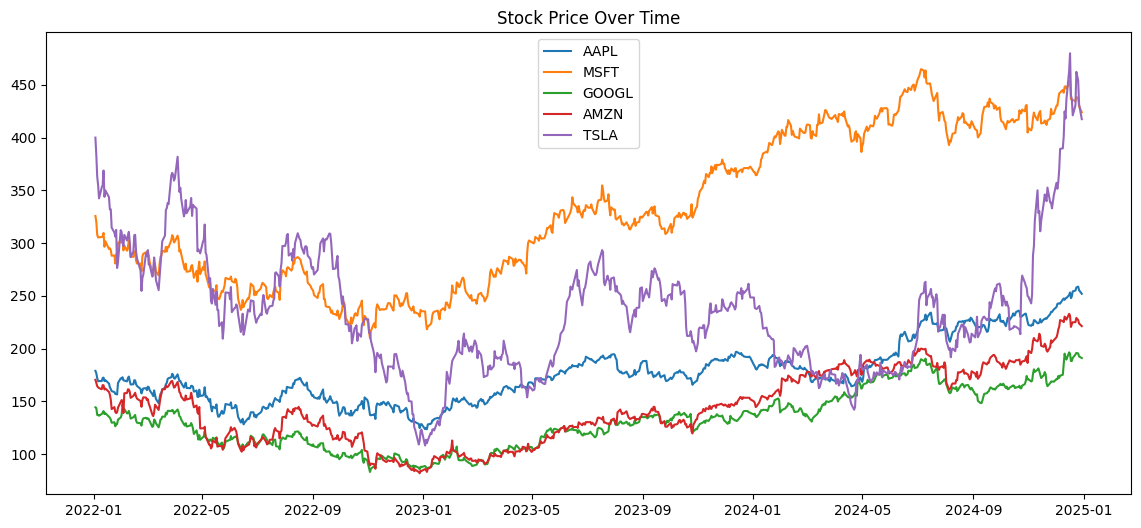

In [ ]:
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title('Stock Price Over Time')
plt.legend()
plt.show()


In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Show sample returns
returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2022-01-04,-0.012691,-0.016916,-0.004083,-0.017147,-0.041833
2022-01-05,-0.026600,-0.018893,-0.045876,-0.038388,-0.053471
2022-01-06,-0.016693,-0.006711,-0.000200,-0.007902,-0.021523
2022-01-07,0.000988,-0.004288,-0.005303,0.000510,-0.035447
2022-01-10,0.000116,-0.006570,0.012061,0.000732,0.030342


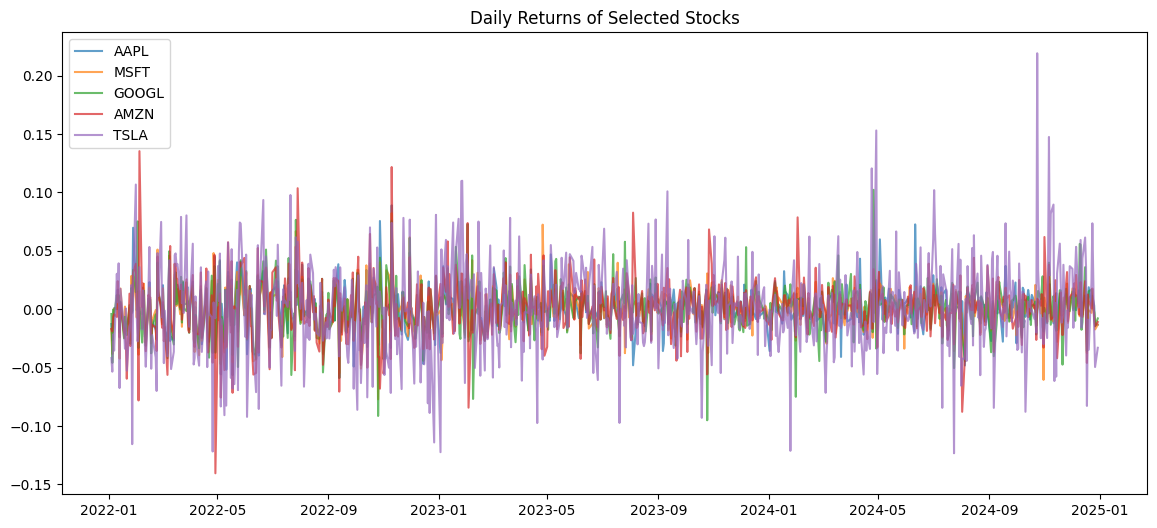

In [ ]:
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Returns of Selected Stocks')
plt.legend()
plt.show()


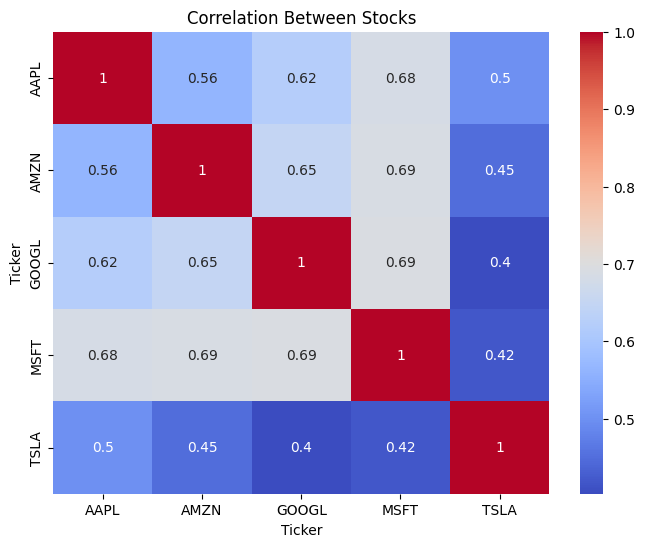

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Stocks")
plt.show()


In [ ]:
import numpy as np

# Number of assets
num_assets = len(tickers)

# Number of portfolio simulations
num_portfolios = 10000

# Create empty lists for results
results = np.zeros((3 + num_assets, num_portfolios))

# Risk-free rate for Sharpe Ratio
risk_free_rate = 0.0175  # Adjust if needed

# Loop through simulations
for i in range(num_portfolios):
    # Random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    # Portfolio return & volatility
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # Store results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = sharpe_ratio

    # Store weights
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

# Convert to DataFrame
columns = ['Return', 'Risk', 'Sharpe'] + tickers
results_df = pd.DataFrame(results.T, columns=columns)


In [ ]:
# Find portfolio with highest Sharpe Ratio
max_sharpe_portfolio = results_df.loc[results_df['Sharpe'].idxmax()]

# Display optimal weights
print("Optimal Portfolio Allocation:\n")
for stock, weight in zip(tickers, max_sharpe_portfolio[3:]):
    print(f"{stock}: {weight:.2%}")

# Portfolio return and risk
print(f"\nExpected Annual Return: {max_sharpe_portfolio['Return']:.2%}")
print(f"Annual Volatility (Risk): {max_sharpe_portfolio['Risk']:.2%}")
print(f"Sharpe Ratio: {max_sharpe_portfolio['Sharpe']:.2f}")


Optimal Portfolio Allocation:

AAPL: 62.64%
MSFT: 12.77%
GOOGL: 14.51%
AMZN: 5.54%
TSLA: 4.53%

Expected Annual Return: 15.31%
Annual Volatility (Risk): 26.44%
Sharpe Ratio: 0.51


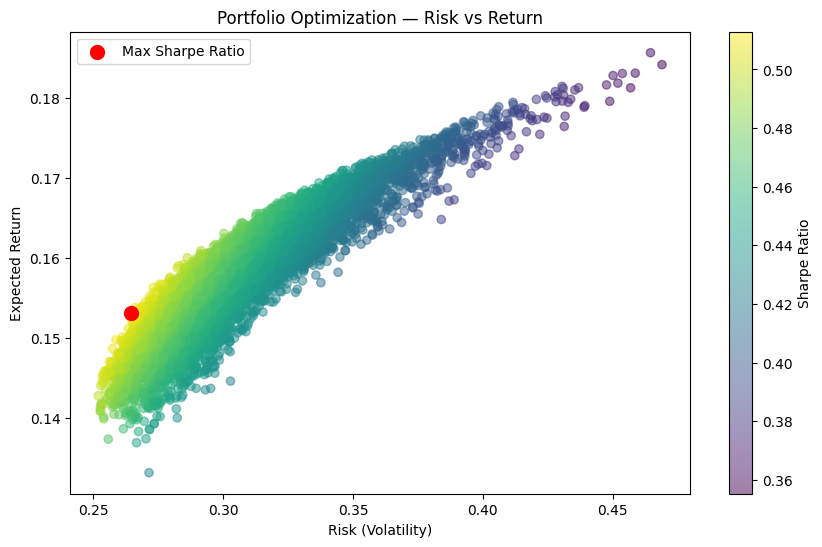

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df.Risk, results_df.Return, c=results_df.Sharpe, cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], c='red', s=100, label='Max Sharpe Ratio')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization — Risk vs Return')
plt.legend()
plt.show()


In [ ]:
# Save all simulated portfolios
results_df.to_csv("all_portfolios.csv", index=False)

# Save the best portfolio
max_sharpe_portfolio.to_frame().reset_index().to_csv("best_portfolio.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe'] + tickers)


In [ ]:
# Step 1: Find minimum risk portfolio
min_risk_portfolio = results_df.loc[results_df['Risk'].idxmin()]

# Step 2: Print details in a clean way
print("Minimum Risk Portfolio Allocation:\n")
for stock in tickers:
    print(f"{stock}: {min_risk_portfolio[stock]:.2%}")

print(f"\nExpected Annual Return: {min_risk_portfolio['Return']:.2%}")
print(f"Annual Volatility (Risk): {min_risk_portfolio['Risk']:.2%}")
print(f"Sharpe Ratio: {min_risk_portfolio['Sharpe']:.2f}")

# Step 3: Save to CSV
min_risk_df = min_risk_portfolio.to_frame().reset_index()
min_risk_df.columns = ['Metric', 'Value']
min_risk_df.to_csv('min_risk_portfolio.csv', index=False)


Minimum Risk Portfolio Allocation:

AAPL: 48.86%
MSFT: 4.84%
GOOGL: 8.55%
AMZN: 37.00%
TSLA: 0.75%

Expected Annual Return: 14.28%
Annual Volatility (Risk): 25.19%
Sharpe Ratio: 0.50


In [ ]:
!pip install prophet


In [ ]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']

# Download directly adjusted close prices
df = yf.download(tickers, start='2020-01-01', end='2025-01-01')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [ ]:
df.head()


Price           Close                                                    High  \
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA       AAPL   
Date                                                                            
2020-01-02  72.716080  94.900497  68.108376  153.323273  28.684000  72.776606   
2020-01-03  72.009125  93.748497  67.752075  151.414078  29.534000  72.771752   
2020-01-06  72.582901  95.143997  69.557945  151.805511  30.102667  72.621639   
2020-01-07  72.241554  95.343002  69.423592  150.421326  31.270666  72.849231   
2020-01-08  73.403648  94.598503  69.917725  152.817368  32.809334  73.706279   

Price                                                    ...       Open  \
Ticker           AMZN      GOOGL        MSFT       TSLA  ...       AAPL   
Date                                                     ...              
2020-01-02  94.900497  68.108376  153.428276  28.713333  ...  71.721026   
2020-01-03  94.309998  68.360669  152.683659  30.266666  ...  71.941336   
2020-01-06  95.184502  69.583321  151.872338  30.104000  ...  71.127858   
2020-01-07  95.694504  69.841098  152.416376  31.441999  ...  72.592601   
2020-01-08  95.550003  70.256604  153.495120  33.232666  ...  71.943759   

Price                                                       Volume            \
Ticker           AMZN      GOOGL        MSFT       TSLA       AAPL      AMZN   
Date                                                                           
2020-01-02  93.750000  67.099702  151.566865  28.299999  135480400  80580000   
2020-01-03  93.224998  67.079297  151.127718  29.366667  146322800  75288000   
2020-01-06  93.000000  67.259926  149.944100  29.364668  118387200  81236000   
2020-01-07  95.224998  69.689821  152.082285  30.760000  108872000  80898000   
2020-01-08  94.902000  69.409154  151.710061  31.580000  132079200  70160000   

Price                                      
Ticker         GOOGL      MSFT       TSLA  
Date                                       
2020-01-02  27278000  22622100  142981500  
2020-01-03  23408000  21116200  266677500  
2020-01-06  46768000  20813700  151995000  
2020-01-07  34330000  21634100  268231500  
2020-01-08  35314000  27746500  467164500  

[5 rows x 25 columns]

In [ ]:
# Assuming `data` is a DataFrame with adjusted close prices
# Let's say we're forecasting AAPL stock prices

# Clean the data (removing missing values, if any)
aapl_data = data['AAPL'].dropna()

# You might also want to use the return data instead of price data for modeling returns
aapl_returns = aapl_data.pct_change().dropna()

# For simplicity, let's use the stock prices for forecasting
aapl_data = aapl_data.reset_index()
aapl_data.columns = ['ds', 'y']
aapl_data['ds'] = pd.to_datetime(aapl_data['ds'])


In [ ]:
!pip install prophet
from prophet import Prophet


In [ ]:
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

df = yf.download(
    tickers,
    start='2018-01-01',
    end='2024-12-31',
    threads=False,
    progress=False
)


In [ ]:
# Select AAPL data and reset index
aapl_data = df['AAPL'].reset_index()

# Rename columns for Prophet
aapl_data.columns = ['ds', 'y']


KeyError: 'AAPL'

In [ ]:
df = yf.download('AAPL', start='2018-01-01', end='2024-12-31', progress=False)
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600
2018-01-03,40.472794,41.017978,40.409348,40.543292,118071600
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400
2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000
2018-01-08,40.970974,41.267063,40.872274,40.970974,82271200


In [ ]:
df.columns = [col[1] for col in df.columns]
df = df.reset_index()
df.head()


,Date,AAPL,AAPL,AAPL,AAPL,AAPL
0,2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600
1,2018-01-03,40.472794,41.017978,40.409348,40.543292,118071600
2,2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400
3,2018-01-05,41.123714,41.210661,40.665479,40.757126,94640000
4,2018-01-08,40.970974,41.267063,40.872274,40.970974,82271200


In [ ]:
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [ ]:
aapl_data = df[['Date', 'Close']].copy()
aapl_data.columns = ['ds', 'y']


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/ir4vhhfl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/8k8qzn3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14761', 'data', 'file=/tmp/tmpa_spwjpo/ir4vhhfl.json', 'init=/tmp/tmpa_spwjpo/8k8qzn3s.json', 'output', 'file=/tmp/tmpa_spwjpo/prophet_modelmaxp6p2z/prophet_model-20250427154547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


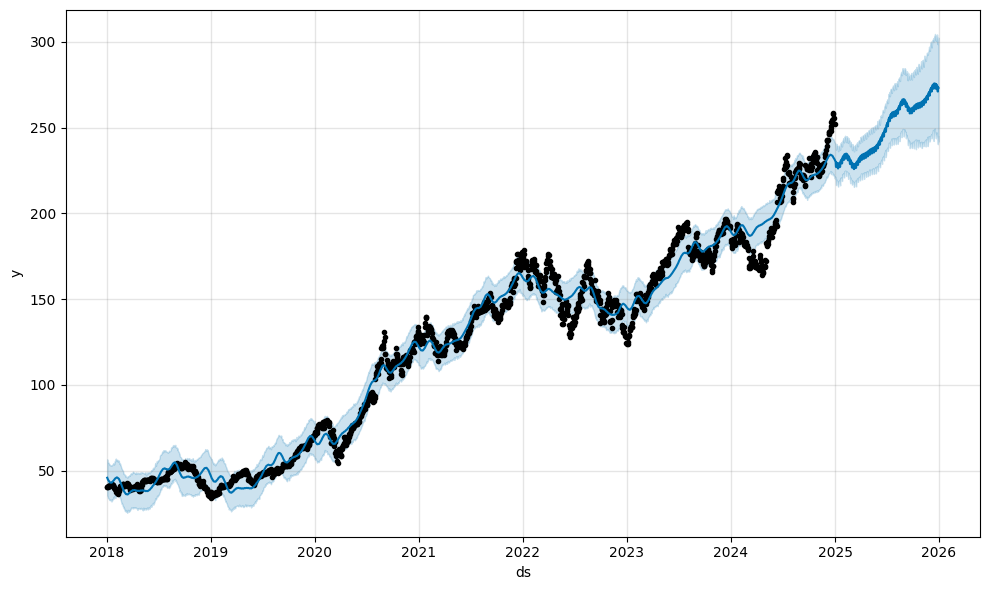

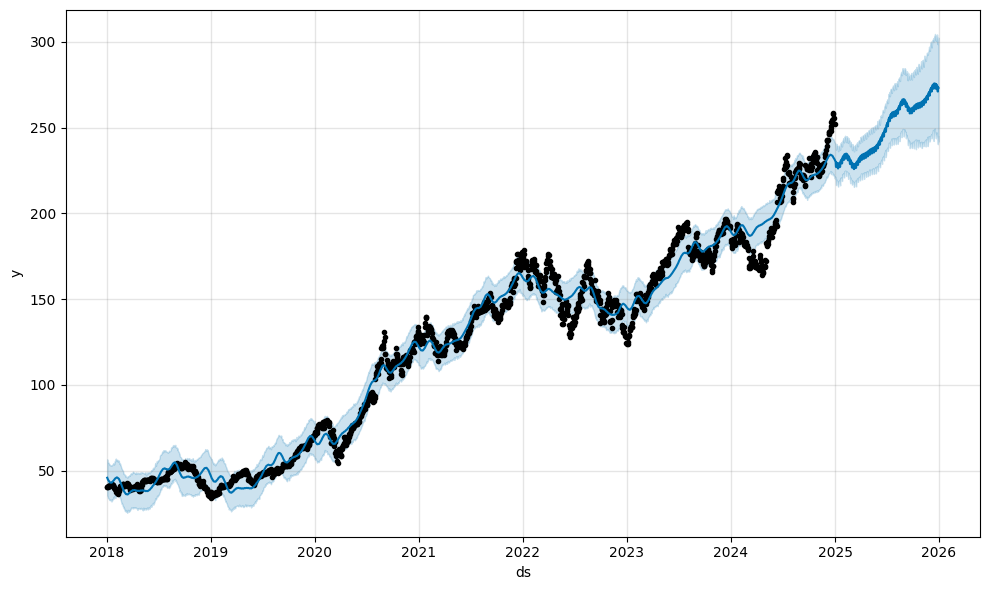

In [ ]:
from prophet import Prophet

model = Prophet(daily_seasonality=False)
model.fit(aapl_data)

# Forecast the next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot it
model.plot(forecast)


In [ ]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from datetime import datetime

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Empty list to hold forecast data
all_forecasts = []
all_actuals = []

# Today's date to limit actual comparison
today = pd.to_datetime(datetime.today().date())

for ticker in tickers:
    print(f"Processing {ticker}...")

    # Download full data up to today
    data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'))

    if data.empty:
        print(f"No data for {ticker}, skipping.")
        continue

    # Use Close price only
    df = data[['Close']].reset_index()
    df.columns = ['ds', 'y']  # Prophet expects these column names

    # Fit the Prophet model
    model = Prophet(daily_seasonality=False)
    model.fit(df)

    # Forecast until 2025-12-31
    future = model.make_future_dataframe(periods=(pd.to_datetime('2025-12-31') - df['ds'].max()).days)
    forecast = model.predict(future)

    # Add ticker and keep relevant columns
    forecast['Ticker'] = ticker
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Ticker']]

    all_forecasts.append(forecast)

    # Save actuals separately for comparison
    actual = df.copy()
    actual['Ticker'] = ticker
    all_actuals.append(actual)

# Combine forecast and actuals
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)
actuals_df = pd.concat(all_actuals, ignore_index=True)

# Merge on date and ticker to compare where overlapping
merged_df = pd.merge(final_forecast_df, actuals_df, on=['ds', 'Ticker'], how='left')
merged_df.rename(columns={'y': 'actual'}, inplace=True)

# Save for Power BI or further analysis
merged_df.to_csv("multi_stock_forecasts_with_actuals.csv", index=False)

print("✅ Forecast + actual comparison saved to 'multi_stock_forecasts_with_actuals.csv'")


Processing AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/f8_wtilf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/wo4xa5kr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3159', 'data', 'file=/tmp/tmp4p75q53k/f8_wtilf.json', 'init=/tmp/tmp4p75q53k/wo4xa5kr.json', 'output', 'file=/tmp/tmp4p75q53k/prophet_modelom2gua3f/prophet_model-20250504093941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing MSFT...


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/vzwxzmvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/3svcwu_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14290', 'data', 'file=/tmp/tmp4p75q53k/vzwxzmvv.json', 'init=/tmp/tmp4p75q53k/3svcwu_2.json', 'output', 'file=/tmp/tmp4p75q53k/prophet_modeldf9yoqca/prophet_model-20250504093946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing GOOGL...


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/8eysm9ar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/h1u7nxl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13927', 'data', 'file=/tmp/tmp4p75q53k/8eysm9ar.json', 'init=/tmp/tmp4p75q53k/h1u7nxl6.json', 'output', 'file=/tmp/tmp4p75q53k/prophet_model8te6v16l/prophet_model-20250504093952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing AMZN...


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/5rmqn75m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/2uqxnkh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27228', 'data', 'file=/tmp/tmp4p75q53k/5rmqn75m.json', 'init=/tmp/tmp4p75q53k/2uqxnkh2.json', 'output', 'file=/tmp/tmp4p75q53k/prophet_modelz6zt8h66/prophet_model-20250504093955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/g16242j1.json


Processing TSLA...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4p75q53k/4pv_eh1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98002', 'data', 'file=/tmp/tmp4p75q53k/g16242j1.json', 'init=/tmp/tmp4p75q53k/4pv_eh1j.json', 'output', 'file=/tmp/tmp4p75q53k/prophet_modelvnk2mv07/prophet_model-20250504093957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Forecast + actual comparison saved to 'multi_stock_forecasts_with_actuals.csv'


In [ ]:
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download full OHLCV data (with multi-index columns)
data = yf.download(tickers, start='2018-01-01', end='2024-12-31')

# Show column structure
print(data.columns)


[*********************100%***********************]  5 of 5 completed

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])


In [ ]:
!pip install --upgrade numpy==1.24.3 pandas_ta --force-reinstall


  Using cached pandas_ta-0.3.14b0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 24.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall:

In [ ]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta

# Download data
data = yf.download('AAPL', start='2020-01-01', end='2025-01-01', auto_adjust=False)

# Flatten columns if MultiIndex
if isinstance(data.columns, pd.MultiIndex):
    data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Drop missing rows
data = data.dropna()

# Add RSI
if 'Close' in data.columns:
    data['RSI'] = ta.rsi(data['Close'])
else:
    print("❌ 'Close' column not found.")

# Add MACD
macd = ta.macd(data['Close']) if 'Close' in data.columns else None
if macd is not None and {'MACD_12_26_9', 'MACDs_12_26_9'}.issubset(macd.columns):
    data['MACD_12_26_9'] = macd['MACD_12_26_9']
    data['MACDs_12_26_9'] = macd['MACDs_12_26_9']
else:
    print("⚠️ MACD data not available.")

# Add ATR
if {'High', 'Low', 'Close'}.issubset(data.columns):
    atr = ta.atr(high=data['High'], low=data['Low'], close=data['Close'])
    if atr is not None:
        data['ATR'] = atr
    else:
        print("⚠️ ATR calculation returned None.")
else:
    print("❌ High/Low/Close columns missing for ATR.")

# Only show available columns
cols_to_show = [col for col in ['Close', 'RSI', 'MACD_12_26_9', 'MACDs_12_26_9', 'ATR'] if col in data.columns]
print(data[cols_to_show].dropna().tail())



[*********************100%***********************]  1 of 1 completed

❌ 'Close' column not found.
⚠️ MACD data not available.
❌ High/Low/Close columns missing for ATR.
Empty DataFrame
Columns: []
Index: [2024-12-24 00:00:00, 2024-12-26 00:00:00, 2024-12-27 00:00:00, 2024-12-30 00:00:00, 2024-12-31 00:00:00]


In [ ]:
# Extract only 'Close' prices
price_data = data['Close']

# Check the structure
print(price_data.head())


Ticker           AAPL       AMZN      GOOGL       MSFT       TSLA
Date                                                             
2018-01-02  40.479839  59.450500  53.405174  79.474167  21.368668
2018-01-03  40.472794  60.209999  54.316319  79.844009  21.150000
2018-01-04  40.660789  60.479500  54.527306  80.546761  20.974667
2018-01-05  41.123714  61.457001  55.250351  81.545395  21.105333
2018-01-08  40.970974  62.343498  55.445415  81.628601  22.427334


In [ ]:
price_data.to_csv("close_prices_all_stocks.csv")


In [ ]:
import yfinance as yf
import pandas as pd
from prophet import Prophet


In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start="2018-01-01", end="2024-12-31", group_by='ticker')


[*********************100%***********************]  3 of 3 completed


In [ ]:
print(data.columns)


MultiIndex([( 'MSFT',   'Open'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',  'Close'),
            ( 'MSFT', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
            ( 'AAPL', 'Volume'),
            ('GOOGL',   'Open'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',  'Close'),
            ('GOOGL', 'Volume')],
           names=['Ticker', 'Price'])


In [ ]:
aapl_df = data['AAPL'][['Close']].reset_index()
aapl_df.columns = ['ds', 'y']
aapl_df['y'] = pd.to_numeric(aapl_df['y'], errors='coerce')
aapl_df = aapl_df.dropna()


In [ ]:
from prophet import Prophet

model = Prophet(daily_seasonality=False)
model.fit(aapl_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/26s85_bp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/v02xye00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76760', 'data', 'file=/tmp/tmpa_spwjpo/26s85_bp.json', 'init=/tmp/tmpa_spwjpo/v02xye00.json', 'output', 'file=/tmp/tmpa_spwjpo/prophet_modelwdowaqur/prophet_model-20250427154643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast 365 days into the future
future = model.make_future_dataframe(periods=365)

# Generate forecast
forecast = model.predict(future)


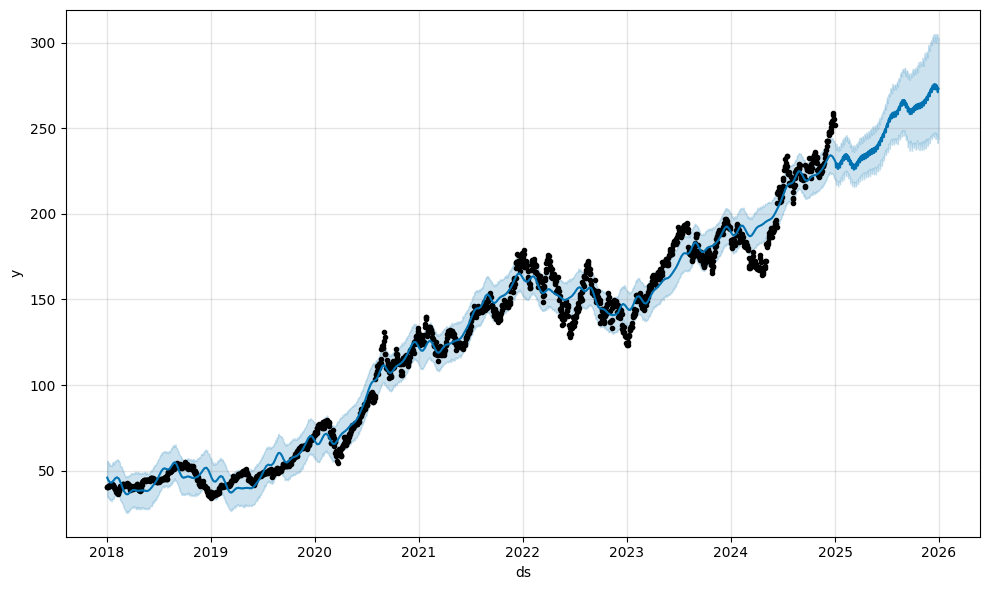

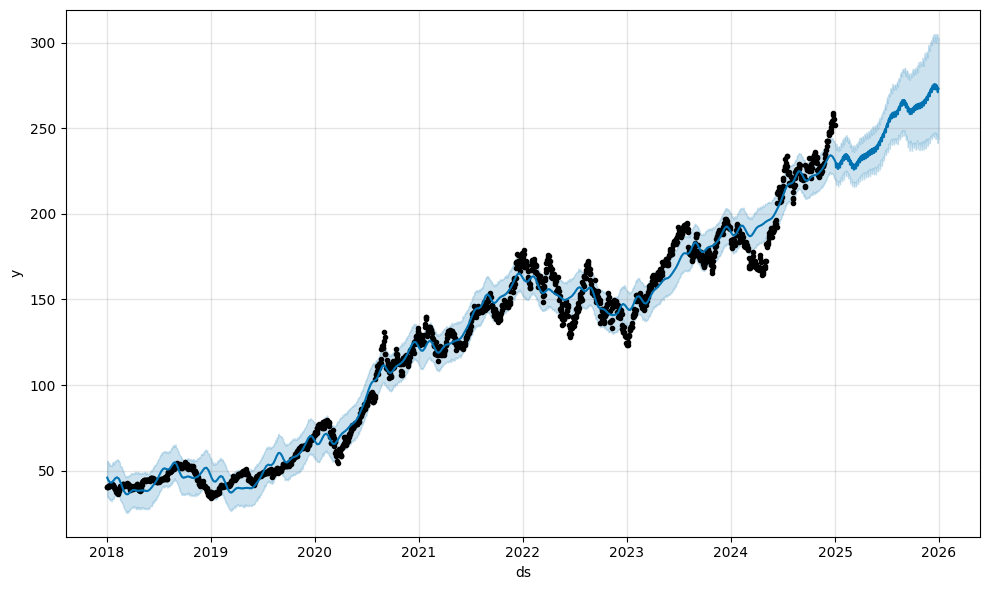

In [ ]:
model.plot(forecast)


In [ ]:
from prophet import Prophet
import pandas as pd

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

for ticker in tickers:
    print(f"Processing {ticker}...")

    # Extract and format data correctly from MultiIndex
    df = data[('Close', ticker)].reset_index()
    df.columns = ['ds', 'y']
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df.dropna(inplace=True)

    # Fit Prophet model
    model = Prophet(daily_seasonality=False)
    model.fit(df)

    # Forecast 1 year ahead
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # Save forecast
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(f'{ticker}_forecast.csv', index=False)

    # Optional: plot forecast
    model.plot(forecast)


Processing AAPL...


KeyError: ('Close', 'AAPL')

In [ ]:
print(data.columns.tolist())


[('MSFT', 'Open'), ('MSFT', 'High'), ('MSFT', 'Low'), ('MSFT', 'Close'), ('MSFT', 'Volume'), ('AAPL', 'Open'), ('AAPL', 'High'), ('AAPL', 'Low'), ('AAPL', 'Close'), ('AAPL', 'Volume'), ('GOOGL', 'Open'), ('GOOGL', 'High'), ('GOOGL', 'Low'), ('GOOGL', 'Close'), ('GOOGL', 'Volume')]


In [ ]:
ticker = 'AAPL'  # or any other stock from your list
df = data[(ticker, 'Close')].reset_index()
df.columns = ['ds', 'y']  # Prophet needs 'ds' for date, 'y' for value

# Ensure numeric and drop NaNs
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df = df.dropna()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/puuoolw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/zbba68g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79744', 'data', 'file=/tmp/tmpa_spwjpo/puuoolw3.json', 'init=/tmp/tmpa_spwjpo/zbba68g7.json', 'output', 'file=/tmp/tmpa_spwjpo/prophet_modelgia3am2h/prophet_model-20250427154756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


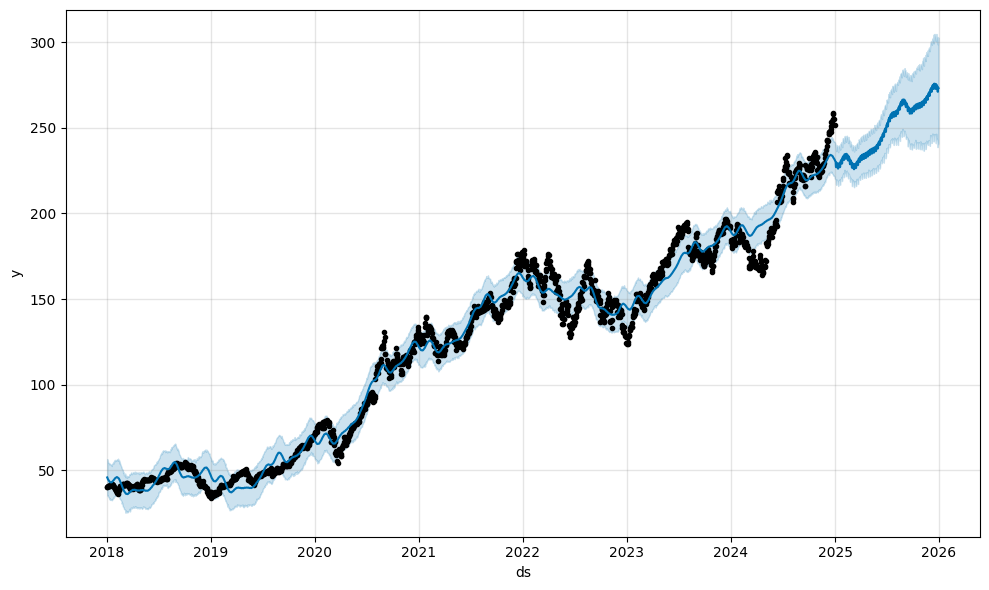

In [ ]:
# Install the required libraries (run this if necessary)
# pip install prophet
# pip install matplotlib

# Importing necessary libraries
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize and fit Prophet model
model = Prophet(daily_seasonality=False)
model.fit(df)

# Forecast future
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.show()


In [ ]:
# Save the forecast data to CSV
forecast.to_csv('/content/forecasted_data.csv', index=False)  # Save to the default directory in Colab


In [ ]:
# Download the saved CSV file
from google.colab import files
files.download('/content/forecasted_data.csv')  # Use the full path to the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Inspect the structure of 'data'
print(data.head())  # See the first few rows of data

# Check the MultiIndex levels to ensure correct access
print(data.index)

# Try accessing the data using correct MultiIndex access
try:
    df = data.loc[:, ('Close', 'AAPL')].reset_index()  # Extract AAPL close prices
    df.columns = ['ds', 'y']
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df.dropna(inplace=True)
    print(df.head())  # Display the first few rows after processing
except KeyError as e:
    print(f"KeyError: {e}. Check the MultiIndex structure.")


Ticker           MSFT                                                  AAPL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2018-01-02  79.640605  79.807044  79.058075  79.474167  22483800  39.986357   
2018-01-03  79.575858  79.991958  79.492643  79.844009  26061400  40.543292   
2018-01-04  80.065936  81.055324  80.047446  80.546761  21912000  40.545642   
2018-01-05  81.055328  81.748820  80.842655  81.545395  23407100  40.757126   
2018-01-08  81.554627  81.906001  80.999835  81.628601  22113000  40.970974   

Ticker                                                      GOOGL             \
Price            High        Low      Close     Volume       Open       High   
Date                                                                           
2018-01-02  40.489241  39.774861  40.479839  102223600  52.400479  53.543015   
2018-01-03  41.017978  40.409348  40.472794  11

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

for ticker in tickers:
    print(f"Processing {ticker}...")

    try:
        # Accessing the 'Close' price for the ticker using the correct MultiIndex
        df = data.xs(ticker, level=0, axis=1)['Close'].reset_index()  # level=0 is for ticker
        df.columns = ['ds', 'y']  # Rename columns for Prophet
        df['y'] = pd.to_numeric(df['y'], errors='coerce')
        df.dropna(inplace=True)

        # Fit Prophet model
        model = Prophet(daily_seasonality=False)
        model.fit(df)

        # Forecast 1 year ahead
        future = model.make_future_dataframe(periods=365)
        forecast = model.predict(future)

        # Save forecast to CSV
        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(f'{ticker}_forecast.csv', index=False)

        # Plot the forecast and save to file
        fig = model.plot(forecast)
        plt.title(f'Forecast for {ticker}')
        plt.savefig(f"{ticker}_forecast_plot.png")  # Save the plot as a PNG file
        plt.close()  # Close the plot after saving to prevent overlaps
    except KeyError as e:
        print(f"Error with ticker {ticker}: {e}")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/03j77g63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/f948kn2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66180', 'data', 'file=/tmp/tmpa_spwjpo/03j77g63.json', 'init=/tmp/tmpa_spwjpo/f948kn2j.json', 'output', 'file=/tmp/tmpa_spwjpo/prophet_modelm3kzhhs9/prophet_model-20250427154817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing AAPL...


15:48:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/gejmp60y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/de6nr7ou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67438', 'data', 'file=/tmp/tmpa_spwjpo/gejmp60y.json', 'init=/tmp/tmpa_spwjpo/de6nr7ou.json', 'output', 'file=/tmp/tmpa_spwjpo/prophet_modelviqg_r8_/prophet_model-20250427154818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing MSFT...


15:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/upfbca1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_spwjpo/oka19u0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4343', 'data', 'file=/tmp/tmpa_spwjpo/upfbca1p.json', 'init=/tmp/tmpa_spwjpo/oka19u0h.json', 'output', 'file=/tmp/tmpa_spwjpo/prophet_model0ratyl5b/prophet_model-20250427154819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing GOOGL...


15:48:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing AMZN...
Error with ticker AMZN: 'AMZN'
Processing TSLA...
Error with ticker TSLA: 'TSLA'


In [ ]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from datetime import datetime

# ✅ Sample Nifty 100 tickers (expand this as needed)
tickers = [
    'RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'TCS.NS',
    'LT.NS', 'ITC.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'BHARTIARTL.NS',
    'ASIANPAINT.NS', 'BAJFINANCE.NS', 'HINDUNILVR.NS', 'AXISBANK.NS', 'MARUTI.NS',
    'SUNPHARMA.NS', 'ULTRACEMCO.NS', 'HCLTECH.NS', 'NTPC.NS', 'POWERGRID.NS',
    'NESTLEIND.NS', 'TECHM.NS', 'TITAN.NS', 'JSWSTEEL.NS', 'ADANIENT.NS',
    'ADANIGREEN.NS', 'TATAMOTORS.NS', 'WIPRO.NS', 'COALINDIA.NS', 'ONGC.NS'
]


# Containers
all_forecasts = []
all_actuals = []

today = pd.to_datetime(datetime.today().date())

for ticker in tickers:
    print(f"📈 Processing {ticker}...")

    try:
        data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)

        if data.empty:
            print(f"⚠️ No data for {ticker}, skipping.")
            continue

        df = data[['Close']].reset_index()
        df.columns = ['ds', 'y']

        model = Prophet(daily_seasonality=False)
        model.fit(df)

        future = model.make_future_dataframe(periods=(pd.to_datetime('2025-12-31') - df['ds'].max()).days)
        forecast = model.predict(future)

        forecast['Ticker'] = ticker
        forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Ticker']]
        all_forecasts.append(forecast)

        actual = df.copy()
        actual['Ticker'] = ticker
        all_actuals.append(actual)

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
        continue

# Combine and export
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)
actuals_df = pd.concat(all_actuals, ignore_index=True)

merged_df = pd.merge(final_forecast_df, actuals_df, on=['ds', 'Ticker'], how='left')
merged_df.rename(columns={'y': 'actual'}, inplace=True)

merged_df.to_csv("multi_stock_forecasts_with_actuals_india.csv", index=False)
print("✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'")


📈 Processing RELIANCE.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/u6kuthqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/tfwqxunn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54659', 'data', 'file=/tmp/tmp4gxf4kgx/u6kuthqe.json', 'init=/tmp/tmp4gxf4kgx/tfwqxunn.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model6wlcr_hk/prophet_model-20250713071146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HDFCBANK.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/onu5qs17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3k2xixre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81380', 'data', 'file=/tmp/tmp4gxf4kgx/onu5qs17.json', 'init=/tmp/tmp4gxf4kgx/3k2xixre.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelb1aahfoh/prophet_model-20250713071148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ICICIBANK.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/91lkw3ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/yxf3ge6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33577', 'data', 'file=/tmp/tmp4gxf4kgx/91lkw3ze.json', 'init=/tmp/tmp4gxf4kgx/yxf3ge6s.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model4r6gog_2/prophet_model-20250713071150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing INFY.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3t_kjmm0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3f0goqz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95365', 'data', 'file=/tmp/tmp4gxf4kgx/3t_kjmm0.json', 'init=/tmp/tmp4gxf4kgx/3f0goqz8.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeluhdotzqq/prophet_model-20250713071152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TCS.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/s9n05fxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/yjgh88nz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81826', 'data', 'file=/tmp/tmp4gxf4kgx/s9n05fxk.json', 'init=/tmp/tmp4gxf4kgx/yjgh88nz.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model8zslepn6/prophet_model-20250713071155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing LT.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/yjip4jvm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kjaitv63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53817', 'data', 'file=/tmp/tmp4gxf4kgx/yjip4jvm.json', 'init=/tmp/tmp4gxf4kgx/kjaitv63.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelayvtq84y/prophet_model-20250713071158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ITC.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3twlbcri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/v1ojtc2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27886', 'data', 'file=/tmp/tmp4gxf4kgx/3twlbcri.json', 'init=/tmp/tmp4gxf4kgx/v1ojtc2_.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modellcibqqa4/prophet_model-20250713071159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing KOTAKBANK.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/13oc8lwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/svteqad_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80505', 'data', 'file=/tmp/tmp4gxf4kgx/13oc8lwc.json', 'init=/tmp/tmp4gxf4kgx/svteqad_.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modele0wpd875/prophet_model-20250713071201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SBIN.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/meklt6o4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/61a_9l1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99500', 'data', 'file=/tmp/tmp4gxf4kgx/meklt6o4.json', 'init=/tmp/tmp4gxf4kgx/61a_9l1w.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_f46zxoc/prophet_model-20250713071202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BHARTIARTL.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/7j4t14e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/s7ff5nrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78523', 'data', 'file=/tmp/tmp4gxf4kgx/7j4t14e3.json', 'init=/tmp/tmp4gxf4kgx/s7ff5nrb.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model2mjpo1ab/prophet_model-20250713071203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ASIANPAINT.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/nk3wb8lj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/9rc64n2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48059', 'data', 'file=/tmp/tmp4gxf4kgx/nk3wb8lj.json', 'init=/tmp/tmp4gxf4kgx/9rc64n2g.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modely94cz_q7/prophet_model-20250713071205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJFINANCE.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/y00629u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/tb7wntff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60216', 'data', 'file=/tmp/tmp4gxf4kgx/y00629u0.json', 'init=/tmp/tmp4gxf4kgx/tb7wntff.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model1lv5cr_x/prophet_model-20250713071206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HINDUNILVR.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/r9kjr6gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/dsauwjhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13649', 'data', 'file=/tmp/tmp4gxf4kgx/r9kjr6gm.json', 'init=/tmp/tmp4gxf4kgx/dsauwjhq.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model83o1ft17/prophet_model-20250713071207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing AXISBANK.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/02k90t1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/som6r9x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45041', 'data', 'file=/tmp/tmp4gxf4kgx/02k90t1v.json', 'init=/tmp/tmp4gxf4kgx/som6r9x0.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelc1gdzp7s/prophet_model-20250713071208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MARUTI.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/k_7l91_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mvt2_hhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44353', 'data', 'file=/tmp/tmp4gxf4kgx/k_7l91_u.json', 'init=/tmp/tmp4gxf4kgx/mvt2_hhf.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model44d_ggqb/prophet_model-20250713071210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SUNPHARMA.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/8ybpddo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ff9alkyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50499', 'data', 'file=/tmp/tmp4gxf4kgx/8ybpddo9.json', 'init=/tmp/tmp4gxf4kgx/ff9alkyt.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelmuoopg0z/prophet_model-20250713071212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ULTRACEMCO.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kr4aj7al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ohvmg3gx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43817', 'data', 'file=/tmp/tmp4gxf4kgx/kr4aj7al.json', 'init=/tmp/tmp4gxf4kgx/ohvmg3gx.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model9681mbo7/prophet_model-20250713071213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HCLTECH.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/nfjqoat4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/zpl0f7r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70435', 'data', 'file=/tmp/tmp4gxf4kgx/nfjqoat4.json', 'init=/tmp/tmp4gxf4kgx/zpl0f7r6.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeljdxdsc78/prophet_model-20250713071215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NTPC.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/9m78qlmv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/sq4fkezt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3790', 'data', 'file=/tmp/tmp4gxf4kgx/9m78qlmv.json', 'init=/tmp/tmp4gxf4kgx/sq4fkezt.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelpagk8u2e/prophet_model-20250713071216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing POWERGRID.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/7algggnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/618wk6os.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96605', 'data', 'file=/tmp/tmp4gxf4kgx/7algggnh.json', 'init=/tmp/tmp4gxf4kgx/618wk6os.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelknrnkzn8/prophet_model-20250713071218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NESTLEIND.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/j3v_wtkx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/2h_00_hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8615', 'data', 'file=/tmp/tmp4gxf4kgx/j3v_wtkx.json', 'init=/tmp/tmp4gxf4kgx/2h_00_hx.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelhzjzbl8o/prophet_model-20250713071219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TECHM.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/m3xrl2f_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/7lwcbu2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13542', 'data', 'file=/tmp/tmp4gxf4kgx/m3xrl2f_.json', 'init=/tmp/tmp4gxf4kgx/7lwcbu2w.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelbaq1bu9h/prophet_model-20250713071221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TITAN.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/8jssurpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/cbpgp7fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72400', 'data', 'file=/tmp/tmp4gxf4kgx/8jssurpi.json', 'init=/tmp/tmp4gxf4kgx/cbpgp7fg.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelrkmyg75k/prophet_model-20250713071222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing JSWSTEEL.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/w18d13o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mcynlldu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44086', 'data', 'file=/tmp/tmp4gxf4kgx/w18d13o1.json', 'init=/tmp/tmp4gxf4kgx/mcynlldu.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model45p954vv/prophet_model-20250713071224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ADANIENT.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kjkk5jkk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/4hy1evd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22425', 'data', 'file=/tmp/tmp4gxf4kgx/kjkk5jkk.json', 'init=/tmp/tmp4gxf4kgx/4hy1evd8.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelsuv3chgx/prophet_model-20250713071226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-39430038

📈 Processing ADANIGREEN.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/khlno77d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69604', 'data', 'file=/tmp/tmp4gxf4kgx/ksdtj2uc.json', 'init=/tmp/tmp4gxf4kgx/khlno77d.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model0gj77rj0/prophet_model-20250713071227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TATAMOTORS.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/4lkr_x1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/zkf8ukdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81957', 'data', 'file=/tmp/tmp4gxf4kgx/4lkr_x1k.json', 'init=/tmp/tmp4gxf4kgx/zkf8ukdg.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelchl81zzs/prophet_model-20250713071228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing WIPRO.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/pkyldsv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/p19fy65x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8152', 'data', 'file=/tmp/tmp4gxf4kgx/pkyldsv5.json', 'init=/tmp/tmp4gxf4kgx/p19fy65x.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelxcvoqge5/prophet_model-20250713071230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing COALINDIA.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/1r3lbltn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/raymc3k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79616', 'data', 'file=/tmp/tmp4gxf4kgx/1r3lbltn.json', 'init=/tmp/tmp4gxf4kgx/raymc3k0.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeljre88dzo/prophet_model-20250713071231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ONGC.NS...


/tmp/ipython-input-1-394300387.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/46r9acbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/7n0xjcq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61155', 'data', 'file=/tmp/tmp4gxf4kgx/46r9acbu.json', 'init=/tmp/tmp4gxf4kgx/7n0xjcq7.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeluvfqmnpc/prophet_model-20250713071232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'


In [ ]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from datetime import datetime

# ✅ Top 50 Nifty 100 tickers (updated)
tickers = [
    'RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'TCS.NS',
    'LT.NS', 'ITC.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'BHARTIARTL.NS',
    'ASIANPAINT.NS', 'BAJFINANCE.NS', 'HINDUNILVR.NS', 'AXISBANK.NS', 'MARUTI.NS',
    'SUNPHARMA.NS', 'ULTRACEMCO.NS', 'HCLTECH.NS', 'NTPC.NS', 'POWERGRID.NS',
    'NESTLEIND.NS', 'TECHM.NS', 'TITAN.NS', 'JSWSTEEL.NS', 'ADANIENT.NS',
    'ADANIGREEN.NS', 'ADANIPORTS.NS', 'TATAMOTORS.NS', 'WIPRO.NS', 'COALINDIA.NS',
    'ONGC.NS', 'BAJAJFINSV.NS', 'HDFCLIFE.NS', 'BRITANNIA.NS', 'EICHERMOT.NS',
    'DIVISLAB.NS', 'HINDALCO.NS', 'CIPLA.NS', 'BPCL.NS', 'GRASIM.NS',
    'DRREDDY.NS', 'SBILIFE.NS', 'INDUSINDBK.NS', 'TATACONSUM.NS', 'PIDILITIND.NS',
    'BAJAJ-AUTO.NS', 'DABUR.NS', 'ICICIPRULI.NS', 'SHREECEM.NS', 'SIEMENS.NS'
]

# Containers
all_forecasts = []
all_actuals = []

today = pd.to_datetime(datetime.today().date())

for ticker in tickers:
    print(f"📈 Processing {ticker}...")

    try:
        data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)

        if data.empty:
            print(f"⚠️ No data for {ticker}, skipping.")
            continue

        df = data[['Close']].reset_index()
        df.columns = ['ds', 'y']

        model = Prophet(daily_seasonality=False)
        model.fit(df)

        future = model.make_future_dataframe(periods=(pd.to_datetime('2025-12-31') - df['ds'].max()).days)
        forecast = model.predict(future)

        forecast['Ticker'] = ticker
        forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Ticker']]
        all_forecasts.append(forecast)

        actual = df.copy()
        actual['Ticker'] = ticker
        all_actuals.append(actual)

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
        continue

# Combine and export
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)
actuals_df = pd.concat(all_actuals, ignore_index=True)

merged_df = pd.merge(final_forecast_df, actuals_df, on=['ds', 'Ticker'], how='left')
merged_df.rename(columns={'y': 'actual'}, inplace=True)

merged_df.to_csv("multi_stock_forecasts_with_actuals_india.csv", index=False)
print("✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'")


📈 Processing RELIANCE.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/bkh5z1dq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/taf4ar2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9491', 'data', 'file=/tmp/tmp4gxf4kgx/bkh5z1dq.json', 'init=/tmp/tmp4gxf4kgx/taf4ar2q.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model4zjm8xy1/prophet_model-20250713080552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-20959793

📈 Processing HDFCBANK.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3wmuanmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40976', 'data', 'file=/tmp/tmp4gxf4kgx/oduiew_x.json', 'init=/tmp/tmp4gxf4kgx/3wmuanmm.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model7igzs7og/prophet_model-20250713080554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ICICIBANK.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/x0s_8wqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/o2tgnh97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77931', 'data', 'file=/tmp/tmp4gxf4kgx/x0s_8wqq.json', 'init=/tmp/tmp4gxf4kgx/o2tgnh97.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelfiawk61a/prophet_model-20250713080555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing INFY.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/49zrq1cf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/i0o8secz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42447', 'data', 'file=/tmp/tmp4gxf4kgx/49zrq1cf.json', 'init=/tmp/tmp4gxf4kgx/i0o8secz.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelj7m6ue6w/prophet_model-20250713080557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing TCS.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/duhcdoyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1703', 'data', 'file=/tmp/tmp4gxf4kgx/fym_hgtp.json', 'init=/tmp/tmp4gxf4kgx/duhcdoyu.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model0j6rvh1l/prophet_model-20250713080558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/0shqaa48.json


📈 Processing LT.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/gnavrl_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14325', 'data', 'file=/tmp/tmp4gxf4kgx/0shqaa48.json', 'init=/tmp/tmp4gxf4kgx/gnavrl_0.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model49mbjmgz/prophet_model-20250713080600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ep6oq0r2.json


📈 Processing ITC.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/nrecr34z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88448', 'data', 'file=/tmp/tmp4gxf4kgx/ep6oq0r2.json', 'init=/tmp/tmp4gxf4kgx/nrecr34z.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_c0u2wap/prophet_model-20250713080601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/2hf7_4vp.json


📈 Processing KOTAKBANK.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/jstt9yis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75031', 'data', 'file=/tmp/tmp4gxf4kgx/2hf7_4vp.json', 'init=/tmp/tmp4gxf4kgx/jstt9yis.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelarexpt78/prophet_model-20250713080602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/63ysdtxn.json


📈 Processing SBIN.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_jbkgkd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39053', 'data', 'file=/tmp/tmp4gxf4kgx/63ysdtxn.json', 'init=/tmp/tmp4gxf4kgx/_jbkgkd7.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelw496ru5k/prophet_model-20250713080604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/qyi83feq.json


📈 Processing BHARTIARTL.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/u7kxtm4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36172', 'data', 'file=/tmp/tmp4gxf4kgx/qyi83feq.json', 'init=/tmp/tmp4gxf4kgx/u7kxtm4p.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelkykf9ir2/prophet_model-20250713080605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/6g1h2pp4.json


📈 Processing ASIANPAINT.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kfec7yjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5332', 'data', 'file=/tmp/tmp4gxf4kgx/6g1h2pp4.json', 'init=/tmp/tmp4gxf4kgx/kfec7yjp.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeltkkcp37h/prophet_model-20250713080607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJFINANCE.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/acnfog4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/rr0r13pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79017', 'data', 'file=/tmp/tmp4gxf4kgx/acnfog4x.json', 'init=/tmp/tmp4gxf4kgx/rr0r13pp.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelnh35roe0/prophet_model-20250713080608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HINDUNILVR.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/tp6w_jvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/lm7os4hq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45502', 'data', 'file=/tmp/tmp4gxf4kgx/tp6w_jvd.json', 'init=/tmp/tmp4gxf4kgx/lm7os4hq.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model45gbqcgt/prophet_model-20250713080610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing AXISBANK.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/dizp9r37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35750', 'data', 'file=/tmp/tmp4gxf4kgx/ysc63x9r.json', 'init=/tmp/tmp4gxf4kgx/dizp9r37.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model83ul48_e/prophet_model-20250713080611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/6ub8bh4q.json


📈 Processing MARUTI.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/hyv4kvdu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17385', 'data', 'file=/tmp/tmp4gxf4kgx/6ub8bh4q.json', 'init=/tmp/tmp4gxf4kgx/hyv4kvdu.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelt1o046eq/prophet_model-20250713080612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SUNPHARMA.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/pbwtiqji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/i15xd3wp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5279', 'data', 'file=/tmp/tmp4gxf4kgx/pbwtiqji.json', 'init=/tmp/tmp4gxf4kgx/i15xd3wp.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model6dyd0hd3/prophet_model-20250713080613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ULTRACEMCO.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/khjofym5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3zgqpae_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82098', 'data', 'file=/tmp/tmp4gxf4kgx/khjofym5.json', 'init=/tmp/tmp4gxf4kgx/3zgqpae_.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelwhs7e0yt/prophet_model-20250713080615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing HCLTECH.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/nsoz3exr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32556', 'data', 'file=/tmp/tmp4gxf4kgx/ndhrafvd.json', 'init=/tmp/tmp4gxf4kgx/nsoz3exr.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelb2nigr31/prophet_model-20250713080616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/pvc_baye.json


📈 Processing NTPC.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/bbiuw05d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90351', 'data', 'file=/tmp/tmp4gxf4kgx/pvc_baye.json', 'init=/tmp/tmp4gxf4kgx/bbiuw05d.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model5rsrj662/prophet_model-20250713080617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/xqutj8u6.json


📈 Processing POWERGRID.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ismo6twf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63245', 'data', 'file=/tmp/tmp4gxf4kgx/xqutj8u6.json', 'init=/tmp/tmp4gxf4kgx/ismo6twf.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelpukrswub/prophet_model-20250713080619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/pjouy4j5.json


📈 Processing NESTLEIND.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/02hjqtrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21175', 'data', 'file=/tmp/tmp4gxf4kgx/pjouy4j5.json', 'init=/tmp/tmp4gxf4kgx/02hjqtrn.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeld0h2rum_/prophet_model-20250713080620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TECHM.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/qa7brayd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/1caobpda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56145', 'data', 'file=/tmp/tmp4gxf4kgx/qa7brayd.json', 'init=/tmp/tmp4gxf4kgx/1caobpda.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelhngez0mb/prophet_model-20250713080622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing TITAN.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/y8llsha2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94445', 'data', 'file=/tmp/tmp4gxf4kgx/r2c_5uyy.json', 'init=/tmp/tmp4gxf4kgx/y8llsha2.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model5youc5xc/prophet_model-20250713080623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/835tt823.json


📈 Processing JSWSTEEL.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/uvfav7ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32728', 'data', 'file=/tmp/tmp4gxf4kgx/835tt823.json', 'init=/tmp/tmp4gxf4kgx/uvfav7ch.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modele5opbj3v/prophet_model-20250713080625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/1itg8ta3.json


📈 Processing ADANIENT.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/6j8o8zx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85777', 'data', 'file=/tmp/tmp4gxf4kgx/1itg8ta3.json', 'init=/tmp/tmp4gxf4kgx/6j8o8zx4.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelq3p8i3yn/prophet_model-20250713080626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/sd3m4yy9.json


📈 Processing ADANIGREEN.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/vrv0rg4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26694', 'data', 'file=/tmp/tmp4gxf4kgx/sd3m4yy9.json', 'init=/tmp/tmp4gxf4kgx/vrv0rg4e.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelxxqhzupr/prophet_model-20250713080627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ADANIPORTS.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/c9h1_fi2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ttl6vf01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72005', 'data', 'file=/tmp/tmp4gxf4kgx/c9h1_fi2.json', 'init=/tmp/tmp4gxf4kgx/ttl6vf01.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelsa1co8oo/prophet_model-20250713080628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing TATAMOTORS.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/laey8z3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75099', 'data', 'file=/tmp/tmp4gxf4kgx/1guax5er.json', 'init=/tmp/tmp4gxf4kgx/laey8z3i.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model5mpsr4k5/prophet_model-20250713080630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/wfhfo51k.json


📈 Processing WIPRO.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/loz7dqgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96066', 'data', 'file=/tmp/tmp4gxf4kgx/wfhfo51k.json', 'init=/tmp/tmp4gxf4kgx/loz7dqgl.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelrq554vbg/prophet_model-20250713080631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/x6hl298h.json


📈 Processing COALINDIA.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/1uo7zl3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16904', 'data', 'file=/tmp/tmp4gxf4kgx/x6hl298h.json', 'init=/tmp/tmp4gxf4kgx/1uo7zl3z.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeln6ifzq4b/prophet_model-20250713080632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ONGC.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/bzr_t18w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/fq5n5ag4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57568', 'data', 'file=/tmp/tmp4gxf4kgx/bzr_t18w.json', 'init=/tmp/tmp4gxf4kgx/fq5n5ag4.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelt4a95b4z/prophet_model-20250713080634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJAJFINSV.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/0656v9mk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/7jc521kn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48952', 'data', 'file=/tmp/tmp4gxf4kgx/0656v9mk.json', 'init=/tmp/tmp4gxf4kgx/7jc521kn.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model12nhqq_w/prophet_model-20250713080636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing HDFCLIFE.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_a4t41mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15991', 'data', 'file=/tmp/tmp4gxf4kgx/a806fyqu.json', 'init=/tmp/tmp4gxf4kgx/_a4t41mg.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelr3qrfyjo/prophet_model-20250713080637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BRITANNIA.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/qg2v4ts4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/cqeoct4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64300', 'data', 'file=/tmp/tmp4gxf4kgx/qg2v4ts4.json', 'init=/tmp/tmp4gxf4kgx/cqeoct4k.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelmsyv6xho/prophet_model-20250713080638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing EICHERMOT.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/j_5s_55v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kz0n5r0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98786', 'data', 'file=/tmp/tmp4gxf4kgx/j_5s_55v.json', 'init=/tmp/tmp4gxf4kgx/kz0n5r0h.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelns0x1_v6/prophet_model-20250713080639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing DIVISLAB.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/c2p5n0mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/12lwuz_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3203', 'data', 'file=/tmp/tmp4gxf4kgx/c2p5n0mi.json', 'init=/tmp/tmp4gxf4kgx/12lwuz_q.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeliae17q9u/prophet_model-20250713080641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HINDALCO.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/cfvkhb7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/e_9patce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90175', 'data', 'file=/tmp/tmp4gxf4kgx/cfvkhb7h.json', 'init=/tmp/tmp4gxf4kgx/e_9patce.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelcqmnhz05/prophet_model-20250713080642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing CIPLA.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/fwhn8ik5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/4bvenj_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97430', 'data', 'file=/tmp/tmp4gxf4kgx/fwhn8ik5.json', 'init=/tmp/tmp4gxf4kgx/4bvenj_2.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_gxep1x5/prophet_model-20250713080644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BPCL.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mx9v2cr7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mmwpgobk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98536', 'data', 'file=/tmp/tmp4gxf4kgx/mx9v2cr7.json', 'init=/tmp/tmp4gxf4kgx/mmwpgobk.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeld1y6ppfn/prophet_model-20250713080645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing GRASIM.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/f7_z1r4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mklpiqsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35700', 'data', 'file=/tmp/tmp4gxf4kgx/f7_z1r4d.json', 'init=/tmp/tmp4gxf4kgx/mklpiqsh.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelfp8j4h7c/prophet_model-20250713080647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing DRREDDY.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/hplp59xa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/k3x4kf85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30217', 'data', 'file=/tmp/tmp4gxf4kgx/hplp59xa.json', 'init=/tmp/tmp4gxf4kgx/k3x4kf85.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model5j6pexuc/prophet_model-20250713080649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3-2095979

📈 Processing SBILIFE.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/vu9d2hm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78880', 'data', 'file=/tmp/tmp4gxf4kgx/gt0sj_gz.json', 'init=/tmp/tmp4gxf4kgx/vu9d2hm0.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model65tww2zx/prophet_model-20250713080650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing INDUSINDBK.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/8hys87rc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/2_zwy471.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47722', 'data', 'file=/tmp/tmp4gxf4kgx/8hys87rc.json', 'init=/tmp/tmp4gxf4kgx/2_zwy471.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelyv2g8lla/prophet_model-20250713080652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TATACONSUM.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/k42bacd8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kzvwrf9c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11028', 'data', 'file=/tmp/tmp4gxf4kgx/k42bacd8.json', 'init=/tmp/tmp4gxf4kgx/kzvwrf9c.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelwf1moe4q/prophet_model-20250713080653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing PIDILITIND.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/hvs8l1ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/c5oqgmle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37729', 'data', 'file=/tmp/tmp4gxf4kgx/hvs8l1ue.json', 'init=/tmp/tmp4gxf4kgx/c5oqgmle.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model6s5twi07/prophet_model-20250713080654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJAJ-AUTO.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/fm_kgm19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/1rb9a7ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20599', 'data', 'file=/tmp/tmp4gxf4kgx/fm_kgm19.json', 'init=/tmp/tmp4gxf4kgx/1rb9a7ml.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelxxcgyq6c/prophet_model-20250713080655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing DABUR.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/eleguqvm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/t7hxlqmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58887', 'data', 'file=/tmp/tmp4gxf4kgx/eleguqvm.json', 'init=/tmp/tmp4gxf4kgx/t7hxlqmu.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model9njhbzz8/prophet_model-20250713080657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ICICIPRULI.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/zzlfcj6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/8ozb3b3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67250', 'data', 'file=/tmp/tmp4gxf4kgx/zzlfcj6j.json', 'init=/tmp/tmp4gxf4kgx/8ozb3b3x.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modellwn2po6x/prophet_model-20250713080658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SHREECEM.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kxjwl_y4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/xaz_eg3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43337', 'data', 'file=/tmp/tmp4gxf4kgx/kxjwl_y4.json', 'init=/tmp/tmp4gxf4kgx/xaz_eg3s.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelry2anx9z/prophet_model-20250713080700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:07:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SIEMENS.NS...


/tmp/ipython-input-3-2095979321.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/g7mvmeh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_v12ubdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40660', 'data', 'file=/tmp/tmp4gxf4kgx/g7mvmeh0.json', 'init=/tmp/tmp4gxf4kgx/_v12ubdr.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelrofh0nl1/prophet_model-20250713080702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:07:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'


In [ ]:
#small caps 50

import yfinance as yf
import pandas as pd
from prophet import Prophet
from datetime import datetime

# ✅ Top 50 Nifty 100 tickers (updated)
tickers = [
    'BALAMINES.NS', 'TANLA.NS', 'IBULHSGFIN.NS', 'BASF.NS', 'MAHSEAMLES.NS',
    'CHEMBOND.NS', 'TASTYBITE.NS', 'IGL.NS', 'PNBHOUSING.NS', 'ANURAS.NS',
    'SJVN.NS', 'BCLIND.NS', 'CREDITACC.NS', 'HGINFRA.NS', 'RALLIS.NS',
    'VSTIND.NS', 'FINEORG.NS', 'KIRIINDUS.NS', 'TRIVENI.NS', 'ITDC.NS',
    'GPIL.NS', 'NAM-INDIA.NS', 'MINDACORP.NS', 'PRSMJOHNSN.NS', 'OLECTRA.NS',
    'DIXON.NS', 'MASFIN.NS', 'TCIEXP.NS', 'ZENSARTECH.NS', 'CYIENT.NS',
    'AARTIDRUGS.NS', 'LXCHEM.NS', 'MARKSANS.NS', 'TARC.NS', 'IIFL.NS',
    'CAMPUS.NS', 'ROUTE.NS', 'TEGA.NS', 'MAPMYINDIA.NS', 'NEULANDLAB.NS',
    'MSTCLTD.NS', 'DCAL.NS', 'NLCINDIA.NS', 'RCF.NS', 'WELSPUNIND.NS',
    'HLEGLAS.NS', 'AVANTIFEED.NS', 'GREENPANEL.NS', 'NESCO.NS', 'AKZOINDIA.NS'
]

# Containers
all_forecasts = []
all_actuals = []

today = pd.to_datetime(datetime.today().date())

for ticker in tickers:
    print(f"📈 Processing {ticker}...")

    try:
        data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)

        if data.empty:
            print(f"⚠️ No data for {ticker}, skipping.")
            continue

        df = data[['Close']].reset_index()
        df.columns = ['ds', 'y']

        model = Prophet(daily_seasonality=False)
        model.fit(df)

        future = model.make_future_dataframe(periods=(pd.to_datetime('2025-12-31') - df['ds'].max()).days)
        forecast = model.predict(future)

        forecast['Ticker'] = ticker
        forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Ticker']]
        all_forecasts.append(forecast)

        actual = df.copy()
        actual['Ticker'] = ticker
        all_actuals.append(actual)

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
        continue

# Combine and export
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)
actuals_df = pd.concat(all_actuals, ignore_index=True)

merged_df = pd.merge(final_forecast_df, actuals_df, on=['ds', 'Ticker'], how='left')
merged_df.rename(columns={'y': 'actual'}, inplace=True)

merged_df.to_csv("multi_stock_forecasts_with_actuals_india.csv", index=False)
print("✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'")


📈 Processing BALAMINES.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/6zlf7cha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/75p5rqgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76330', 'data', 'file=/tmp/tmp4gxf4kgx/6zlf7cha.json', 'init=/tmp/tmp4gxf4kgx/75p5rqgk.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model98ylfud9/prophet_model-20250713080454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TANLA.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/v95zwg6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/davx9ky7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50556', 'data', 'file=/tmp/tmp4gxf4kgx/v95zwg6l.json', 'init=/tmp/tmp4gxf4kgx/davx9ky7.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_s6j807m/prophet_model-20250713080455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing IBULHSGFIN.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IBULHSGFIN.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for IBULHSGFIN.NS, skipping.
📈 Processing BASF.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/l129w_fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/v97f7w0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81293', 'data', 'file=/tmp/tmp4gxf4kgx/l129w_fe.json', 'init=/tmp/tmp4gxf4kgx/v97f7w0f.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model82h2a9np/prophet_model-20250713080457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MAHSEAMLES.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/k7k59nwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ydxrf004.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28150', 'data', 'file=/tmp/tmp4gxf4kgx/k7k59nwk.json', 'init=/tmp/tmp4gxf4kgx/ydxrf004.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeldi86wowa/prophet_model-20250713080458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595

📈 Processing CHEMBOND.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/1s85gk3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41185', 'data', 'file=/tmp/tmp4gxf4kgx/i885p9xe.json', 'init=/tmp/tmp4gxf4kgx/1s85gk3o.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model8s9b9bo7/prophet_model-20250713080459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/te_98ma1.json


📈 Processing TASTYBITE.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/wvgls4fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57941', 'data', 'file=/tmp/tmp4gxf4kgx/te_98ma1.json', 'init=/tmp/tmp4gxf4kgx/wvgls4fn.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelw_i9qp4h/prophet_model-20250713080500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing IGL.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/fog8ir0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/l6ahngvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91642', 'data', 'file=/tmp/tmp4gxf4kgx/fog8ir0t.json', 'init=/tmp/tmp4gxf4kgx/l6ahngvh.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model74k7gtbc/prophet_model-20250713080502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing PNBHOUSING.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/72csm94e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/s5llp4y8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99439', 'data', 'file=/tmp/tmp4gxf4kgx/72csm94e.json', 'init=/tmp/tmp4gxf4kgx/s5llp4y8.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model2otpxat0/prophet_model-20250713080503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ANURAS.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/bvc5sbgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ywmidc72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22253', 'data', 'file=/tmp/tmp4gxf4kgx/bvc5sbgt.json', 'init=/tmp/tmp4gxf4kgx/ywmidc72.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_models3oiw0hv/prophet_model-20250713080505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SJVN.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/puba6iys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/9o9merqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3998', 'data', 'file=/tmp/tmp4gxf4kgx/puba6iys.json', 'init=/tmp/tmp4gxf4kgx/9o9merqp.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelo2_er_3x/prophet_model-20250713080506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-25495954

📈 Processing BCLIND.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/zlaqdltv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28195', 'data', 'file=/tmp/tmp4gxf4kgx/mlbabuqu.json', 'init=/tmp/tmp4gxf4kgx/zlaqdltv.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model10c02hnl/prophet_model-20250713080507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_tfdpkhv.json


📈 Processing CREDITACC.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/vtrswclm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63568', 'data', 'file=/tmp/tmp4gxf4kgx/_tfdpkhv.json', 'init=/tmp/tmp4gxf4kgx/vtrswclm.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelrh91jjx8/prophet_model-20250713080508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/4o72a3eg.json


📈 Processing HGINFRA.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ijiftd82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33496', 'data', 'file=/tmp/tmp4gxf4kgx/4o72a3eg.json', 'init=/tmp/tmp4gxf4kgx/ijiftd82.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_jft7egy/prophet_model-20250713080509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing RALLIS.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/grr6n29q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/chs57phs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60673', 'data', 'file=/tmp/tmp4gxf4kgx/grr6n29q.json', 'init=/tmp/tmp4gxf4kgx/chs57phs.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelni0x9lhd/prophet_model-20250713080510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing VSTIND.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/jd1hyryb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/33yhxkie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83055', 'data', 'file=/tmp/tmp4gxf4kgx/jd1hyryb.json', 'init=/tmp/tmp4gxf4kgx/33yhxkie.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelob4cf7y5/prophet_model-20250713080511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing FINEORG.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/43xpwuwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/aa9ar_w3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39336', 'data', 'file=/tmp/tmp4gxf4kgx/43xpwuwq.json', 'init=/tmp/tmp4gxf4kgx/aa9ar_w3.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model5zph4jbi/prophet_model-20250713080512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing KIRIINDUS.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/owdegxfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/tfs9ls9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86884', 'data', 'file=/tmp/tmp4gxf4kgx/owdegxfs.json', 'init=/tmp/tmp4gxf4kgx/tfs9ls9h.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeltnabcnob/prophet_model-20250713080513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TRIVENI.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mibzoo5h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/y2p206ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32498', 'data', 'file=/tmp/tmp4gxf4kgx/mibzoo5h.json', 'init=/tmp/tmp4gxf4kgx/y2p206ml.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelshw65zsr/prophet_model-20250713080514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ITDC.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ek1x8y9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/u66o4yz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42757', 'data', 'file=/tmp/tmp4gxf4kgx/ek1x8y9g.json', 'init=/tmp/tmp4gxf4kgx/u66o4yz1.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelnfgy07oy/prophet_model-20250713080515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing GPIL.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/rda1ffv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/432pnkit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=845', 'data', 'file=/tmp/tmp4gxf4kgx/rda1ffv6.json', 'init=/tmp/tmp4gxf4kgx/432pnkit.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelyb_ym0ow/prophet_model-20250713080516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NAM-INDIA.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/0ps08gpn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/v0he55v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59158', 'data', 'file=/tmp/tmp4gxf4kgx/0ps08gpn.json', 'init=/tmp/tmp4gxf4kgx/v0he55v1.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelhe63spu8/prophet_model-20250713080518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MINDACORP.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/luwbrzd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/u3_s0s9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97753', 'data', 'file=/tmp/tmp4gxf4kgx/luwbrzd7.json', 'init=/tmp/tmp4gxf4kgx/u3_s0s9z.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelzugy5nch/prophet_model-20250713080519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing PRSMJOHNSN.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/vsi0428r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/sabwiqbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6183', 'data', 'file=/tmp/tmp4gxf4kgx/vsi0428r.json', 'init=/tmp/tmp4gxf4kgx/sabwiqbz.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_dtm9ioy/prophet_model-20250713080521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing OLECTRA.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/jbj5t1c8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/7pmf3eoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24955', 'data', 'file=/tmp/tmp4gxf4kgx/jbj5t1c8.json', 'init=/tmp/tmp4gxf4kgx/7pmf3eoj.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelgr32f83o/prophet_model-20250713080522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing DIXON.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/pnfw816i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/vtgag581.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10235', 'data', 'file=/tmp/tmp4gxf4kgx/pnfw816i.json', 'init=/tmp/tmp4gxf4kgx/vtgag581.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeljhgusemw/prophet_model-20250713080523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MASFIN.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/cdkukdo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/kw7nf44q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4134', 'data', 'file=/tmp/tmp4gxf4kgx/cdkukdo4.json', 'init=/tmp/tmp4gxf4kgx/kw7nf44q.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modeln0pbvx_6/prophet_model-20250713080525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TCIEXP.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_tbb3d3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/xxjdbu6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51680', 'data', 'file=/tmp/tmp4gxf4kgx/_tbb3d3f.json', 'init=/tmp/tmp4gxf4kgx/xxjdbu6z.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelorbxd4i4/prophet_model-20250713080526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ZENSARTECH.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/9wbtzpzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/2l9qmh1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8855', 'data', 'file=/tmp/tmp4gxf4kgx/9wbtzpzl.json', 'init=/tmp/tmp4gxf4kgx/2l9qmh1_.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelyy0sl83t/prophet_model-20250713080527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing CYIENT.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/oidesp9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/fj7bm0uo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60630', 'data', 'file=/tmp/tmp4gxf4kgx/oidesp9x.json', 'init=/tmp/tmp4gxf4kgx/fj7bm0uo.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelcfe_dn8m/prophet_model-20250713080528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing AARTIDRUGS.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/bdvxkn3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/fbli_o99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76102', 'data', 'file=/tmp/tmp4gxf4kgx/bdvxkn3a.json', 'init=/tmp/tmp4gxf4kgx/fbli_o99.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model_z_834aw/prophet_model-20250713080530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595

📈 Processing LXCHEM.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/3et7rzo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37995', 'data', 'file=/tmp/tmp4gxf4kgx/9o011gtx.json', 'init=/tmp/tmp4gxf4kgx/3et7rzo_.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelot59mg66/prophet_model-20250713080532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MARKSANS.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/xzvn3c8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/oxjqh3po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68423', 'data', 'file=/tmp/tmp4gxf4kgx/xzvn3c8s.json', 'init=/tmp/tmp4gxf4kgx/oxjqh3po.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelwpg3yn52/prophet_model-20250713080533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595

📈 Processing TARC.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/k2wko7zq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11080', 'data', 'file=/tmp/tmp4gxf4kgx/k_f8fozz.json', 'init=/tmp/tmp4gxf4kgx/k2wko7zq.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model4ceq3zqi/prophet_model-20250713080534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing IIFL.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/d77y8dxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/82p69l2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82885', 'data', 'file=/tmp/tmp4gxf4kgx/d77y8dxv.json', 'init=/tmp/tmp4gxf4kgx/82p69l2n.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelxu6_isty/prophet_model-20250713080535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595

📈 Processing CAMPUS.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/f2vknjgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74889', 'data', 'file=/tmp/tmp4gxf4kgx/_97yt2rl.json', 'init=/tmp/tmp4gxf4kgx/f2vknjgv.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelig8s4szr/prophet_model-20250713080536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/s6qkn436.json


📈 Processing ROUTE.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/8klr0k9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68048', 'data', 'file=/tmp/tmp4gxf4kgx/s6qkn436.json', 'init=/tmp/tmp4gxf4kgx/8klr0k9x.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelnu4pfdhx/prophet_model-20250713080537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/6zvqgt1_.json


📈 Processing TEGA.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/nq5qwnld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43073', 'data', 'file=/tmp/tmp4gxf4kgx/6zvqgt1_.json', 'init=/tmp/tmp4gxf4kgx/nq5qwnld.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model12ums0ty/prophet_model-20250713080537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/rdzs5ih8.json


📈 Processing MAPMYINDIA.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/clwmoue9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69133', 'data', 'file=/tmp/tmp4gxf4kgx/rdzs5ih8.json', 'init=/tmp/tmp4gxf4kgx/clwmoue9.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelb1kjn15v/prophet_model-20250713080538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NEULANDLAB.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/uwwmmtt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/krh8ijue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39245', 'data', 'file=/tmp/tmp4gxf4kgx/uwwmmtt9.json', 'init=/tmp/tmp4gxf4kgx/krh8ijue.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modellpr499m_/prophet_model-20250713080539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MSTCLTD.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/mw96382a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_joa3gq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40435', 'data', 'file=/tmp/tmp4gxf4kgx/mw96382a.json', 'init=/tmp/tmp4gxf4kgx/_joa3gq8.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelif6r9ixn/prophet_model-20250713080540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing DCAL.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/np09cis3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/a76q7ssw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2402', 'data', 'file=/tmp/tmp4gxf4kgx/np09cis3.json', 'init=/tmp/tmp4gxf4kgx/a76q7ssw.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelhbvjwfsn/prophet_model-20250713080541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NLCINDIA.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/_br1pi8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/6o_s_tl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65864', 'data', 'file=/tmp/tmp4gxf4kgx/_br1pi8k.json', 'init=/tmp/tmp4gxf4kgx/6o_s_tl1.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelardeab90/prophet_model-20250713080542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing RCF.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/satw7kpc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ux7epk6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83446', 'data', 'file=/tmp/tmp4gxf4kgx/satw7kpc.json', 'init=/tmp/tmp4gxf4kgx/ux7epk6_.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model2v8kea8e/prophet_model-20250713080544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing WELSPUNIND.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WELSPUNIND.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/oi_tx49a.json


⚠️ No data for WELSPUNIND.NS, skipping.
📈 Processing HLEGLAS.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/u1ai13lm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40372', 'data', 'file=/tmp/tmp4gxf4kgx/oi_tx49a.json', 'init=/tmp/tmp4gxf4kgx/u1ai13lm.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelt442jm0k/prophet_model-20250713080546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing AVANTIFEED.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ffa6y3cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/ivbcn89z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70254', 'data', 'file=/tmp/tmp4gxf4kgx/ffa6y3cd.json', 'init=/tmp/tmp4gxf4kgx/ivbcn89z.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_model3178gmys/prophet_model-20250713080546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-2-2549595

📈 Processing GREENPANEL.NS...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/gdhqgmhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59871', 'data', 'file=/tmp/tmp4gxf4kgx/13hno4y9.json', 'init=/tmp/tmp4gxf4kgx/gdhqgmhk.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelovscx87q/prophet_model-20250713080547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NESCO.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/gkufumti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/qedvhmfg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6204', 'data', 'file=/tmp/tmp4gxf4kgx/gkufumti.json', 'init=/tmp/tmp4gxf4kgx/qedvhmfg.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelrkgcmffy/prophet_model-20250713080549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing AKZOINDIA.NS...


/tmp/ipython-input-2-2549595428.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/txlt76kt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gxf4kgx/zkh68q3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34759', 'data', 'file=/tmp/tmp4gxf4kgx/txlt76kt.json', 'init=/tmp/tmp4gxf4kgx/zkh68q3n.json', 'output', 'file=/tmp/tmp4gxf4kgx/prophet_modelaq3g6dk8/prophet_model-20250713080550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'


In [1]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from datetime import datetime

# 0. Define ticker groups

smallcap_tickers = [
    'IDBI.NS','GODFRYPHLP.NS','LAURUSLABS.NS','MCX.NS','NARAYANA.NS',
    'KAYNES.NS','SUZLON.NS','PERSISTENT.NS','RAILVIND.NS','UNOMINDA.NS',
    'HFCL.NS','ANANTRAJ.NS','SWANENERGY.NS','RADICO.NS','WELSPUNLIV.NS',
    'BEML.NS','RAMKRISHNA.NS','HBLPOWER.NS','APARINDS.NS','JBMA.NS',
    'ITILTD.NS','INOXWIND.NS','RBLBANK.NS','PNBHOUSING.NS','LAURUSLABS.NS',
    'CDSL.NS','TEJASNET.NS','IEX.NS','AARTIIND.NS','AAVAS.NS',
    'PIRPHARMA.NS','CROMPGREAV.NS','SWARAJENG.NS','IRCON.NS','GDRREDDY.NS',
    'AFFLE.NS','STERLINWB.NS','ONEMONEY.NS','INDIAMART.NS','HAPPMIND.NS',
    'ANGELONE.NS','CAGEINFRA.NS','RAILTEL.NS','SHYAMMETAL.NS','DATAPATNS.NS',
    'NMDC.NS','SIGNETGP.NS','GODFRYPHLP.NS','AIGISLOG.NS','CAMLINFINE.NS'
]

largecap_tickers = [
    'ADANIENT.NS','ADANIPORTS.NS','APOLLOHOSP.NS','ASIANPAINT.NS','AXISBANK.NS',
    'BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BEL.NS','BHARTIARTL.NS',
    'CIPLA.NS','COALINDIA.NS','DRREDDY.NS','EICHERMOT.NS','ETERNAL.NS',
    'GRASIM.NS','HCLTECH.NS','HDFCBANK.NS','HDFCLIFE.NS','HEROMOTOCO.NS',
    'HINDALCO.NS','HINDUNILVR.NS','ICICIBANK.NS','INDUSINDBK.NS','INFY.NS',
    'ITC.NS','JIOFIN.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS',
    'M&M.NS','MARUTI.NS','NESTLEIND.NS','NTPC.NS','ONGC.NS',
    'POWERGRID.NS','RELIANCE.NS','SBILIFE.NS','SBIN.NS','SUNPHARMA.NS',
    'TCS.NS','TATACONSUM.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS',
    'TITAN.NS','TRENT.NS','ULTRACEMCO.NS','WIPRO.NS'
]

# 1. Combined
tickers = smallcap_tickers + largecap_tickers
cap_map = {t: 'Small' for t in smallcap_tickers}
cap_map.update({t: 'Large' for t in largecap_tickers})

# 2. Containers
all_forecasts = []
all_actuals = []

today = pd.to_datetime(datetime.today().date())

for ticker in tickers:
    print(f"📈 Processing {ticker} ...")
    try:
        data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
        if data.empty:
            print(f"⚠️ No data for {ticker}, skipping.")
            continue

        df = data[['Close']].reset_index()
        df.columns = ['ds', 'y']

        model = Prophet(daily_seasonality=False)
        model.fit(df)

        future = model.make_future_dataframe(periods=(pd.to_datetime('2025-12-31') - df['ds'].max()).days)
        forecast = model.predict(future)

        forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        forecast['Ticker'] = ticker
        forecast['CapCategory'] = cap_map[ticker]
        all_forecasts.append(forecast)

        actual = df.copy()
        actual['Ticker'] = ticker
        actual['CapCategory'] = cap_map[ticker]
        all_actuals.append(actual)

    except Exception as e:
        print(f"❌ Error on {ticker}: {e}")
        continue

# 3. Merge results
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)
actuals_df = pd.concat(all_actuals, ignore_index=True)

merged_df = pd.merge(final_forecast_df, actuals_df, on=['ds','Ticker','CapCategory'], how='left')
merged_df.rename(columns={'y':'actual'}, inplace=True)

merged_df.to_csv("multi_stock_forecasts_with_actuals_india.csv", index=False)
print("✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'")


📈 Processing IDBI.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/d1mujima.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/pc9y8r8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19258', 'data', 'file=/tmp/tmp950qkxiu/d1mujima.json', 'init=/tmp/tmp950qkxiu/pc9y8r8y.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelkusgk8f7/prophet_model-20250727194814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing GODFRYPHLP.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/uqfkr87y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/qgs0hbtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47121', 'data', 'file=/tmp/tmp950qkxiu/uqfkr87y.json', 'init=/tmp/tmp950qkxiu/qgs0hbtb.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeluw6ilbre/prophet_model-20250727194817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing LAURUSLABS.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/2e3ihd5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/5hmlkepe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60687', 'data', 'file=/tmp/tmp950qkxiu/2e3ihd5w.json', 'init=/tmp/tmp950qkxiu/5hmlkepe.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelr_fk6_u0/prophet_model-20250727194820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MCX.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_uxh_9ua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/8h3r8ozf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28097', 'data', 'file=/tmp/tmp950qkxiu/_uxh_9ua.json', 'init=/tmp/tmp950qkxiu/8h3r8ozf.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelx1lr49x7/prophet_model-20250727194823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NARAYANA.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NARAYANA.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for NARAYANA.NS, skipping.
📈 Processing KAYNES.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/rs7ro5tu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/w3c38479.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85637', 'data', 'file=/tmp/tmp950qkxiu/rs7ro5tu.json', 'init=/tmp/tmp950qkxiu/w3c38479.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelj1_pm941/prophet_model-20250727194826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SUZLON.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/vxzmowwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/vfosanp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80224', 'data', 'file=/tmp/tmp950qkxiu/vxzmowwu.json', 'init=/tmp/tmp950qkxiu/vfosanp7.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeljb7_p3au/prophet_model-20250727194827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing PERSISTENT.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_ape8yls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/k9osh5bb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88370', 'data', 'file=/tmp/tmp950qkxiu/_ape8yls.json', 'init=/tmp/tmp950qkxiu/k9osh5bb.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelbt__eok5/prophet_model-20250727194828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing RAILVIND.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAILVIND.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for RAILVIND.NS, skipping.
📈 Processing UNOMINDA.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ftldwxbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/u75e2hfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2949', 'data', 'file=/tmp/tmp950qkxiu/ftldwxbz.json', 'init=/tmp/tmp950qkxiu/u75e2hfl.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeln6rbya3e/prophet_model-20250727194830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HFCL.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/pwew4k9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ugcpqx2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2840', 'data', 'file=/tmp/tmp950qkxiu/pwew4k9i.json', 'init=/tmp/tmp950qkxiu/ugcpqx2c.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelpwud3vdb/prophet_model-20250727194833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ANANTRAJ.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ffp_fxkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/m4zlm9he.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76789', 'data', 'file=/tmp/tmp950qkxiu/ffp_fxkh.json', 'init=/tmp/tmp950qkxiu/m4zlm9he.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model8hhj3ymp/prophet_model-20250727194834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SWANENERGY.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/fcxtw535.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/q3sxb4oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36504', 'data', 'file=/tmp/tmp950qkxiu/fcxtw535.json', 'init=/tmp/tmp950qkxiu/q3sxb4oq.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model92c90vdi/prophet_model-20250727194835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing RADICO.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/4k9pa2iz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/amq1tri6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58330', 'data', 'file=/tmp/tmp950qkxiu/4k9pa2iz.json', 'init=/tmp/tmp950qkxiu/amq1tri6.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelfwd9n9ls/prophet_model-20250727194837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing WELSPUNLIV.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/cm8apdvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/d_mmg0pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97062', 'data', 'file=/tmp/tmp950qkxiu/cm8apdvw.json', 'init=/tmp/tmp950qkxiu/d_mmg0pw.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelybmzevk_/prophet_model-20250727194838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BEML.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_6mv9jj6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/1zg07bci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39254', 'data', 'file=/tmp/tmp950qkxiu/_6mv9jj6.json', 'init=/tmp/tmp950qkxiu/1zg07bci.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelhabb47kf/prophet_model-20250727194839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing RAMKRISHNA.NS ...
⚠️ No data for RAMKRISHNA.NS, skipping.
📈 Processing HBLPOWER.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HBLPOWER.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for HBLPOWER.NS, skipping.
📈 Processing APARINDS.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/kcbwgbo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/kc_wynb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89457', 'data', 'file=/tmp/tmp950qkxiu/kcbwgbo9.json', 'init=/tmp/tmp950qkxiu/kc_wynb2.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modellnrf4g67/prophet_model-20250727194841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing JBMA.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/daua30o5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/4vnbwk9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24353', 'data', 'file=/tmp/tmp950qkxiu/daua30o5.json', 'init=/tmp/tmp950qkxiu/4vnbwk9t.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelrbfnp7qw/prophet_model-20250727194842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing ITILTD.NS ...
⚠️ No data for ITILTD.NS, skipping.
📈 Processing INOXWIND.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ubaqbncy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/dshoacu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41098', 'data', 'file=/tmp/tmp950qkxiu/ubaqbncy.json', 'init=/tmp/tmp950qkxiu/dshoacu5.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model3a8d0ex8/prophet_model-20250727194844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing RBLBANK.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/bnidxqyh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/lo1qseat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56238', 'data', 'file=/tmp/tmp950qkxiu/bnidxqyh.json', 'init=/tmp/tmp950qkxiu/lo1qseat.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeljcilepki/prophet_model-20250727194845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing PNBHOUSING.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/onma4d_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/mpfb7ipc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73592', 'data', 'file=/tmp/tmp950qkxiu/onma4d_z.json', 'init=/tmp/tmp950qkxiu/mpfb7ipc.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelq0ralyui/prophet_model-20250727194847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing LAURUSLABS.NS ...


19:48:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing CDSL.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/w793evzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/zbos573s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95196', 'data', 'file=/tmp/tmp950qkxiu/w793evzk.json', 'init=/tmp/tmp950qkxiu/zbos573s.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model90ouklc6/prophet_model-20250727194849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TEJASNET.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ef7b677v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ir0x751r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3882', 'data', 'file=/tmp/tmp950qkxiu/ef7b677v.json', 'init=/tmp/tmp950qkxiu/ir0x751r.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model2ink1thc/prophet_model-20250727194850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing IEX.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/86c24fsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/clka3isq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47582', 'data', 'file=/tmp/tmp950qkxiu/86c24fsk.json', 'init=/tmp/tmp950qkxiu/clka3isq.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelcsgp4l0l/prophet_model-20250727194851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing AARTIIND.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/p1ix0qbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/qm9roq1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74199', 'data', 'file=/tmp/tmp950qkxiu/p1ix0qbg.json', 'init=/tmp/tmp950qkxiu/qm9roq1n.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelp82ymyb3/prophet_model-20250727194853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing AAVAS.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/gpnx5vji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6319', 'data', 'file=/tmp/tmp950qkxiu/kug18ht_.json', 'init=/tmp/tmp950qkxiu/gpnx5vji.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelaenksjtd/prophet_model-20250727194854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PIRPHARMA.NS']: YFTzMissingError('possib

📈 Processing PIRPHARMA.NS ...
⚠️ No data for PIRPHARMA.NS, skipping.
📈 Processing CROMPGREAV.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CROMPGREAV.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-01 -> 2025-07-27)')
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for CROMPGREAV.NS, skipping.
📈 Processing SWARAJENG.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/hhijo24e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/fn7jy7yh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36326', 'data', 'file=/tmp/tmp950qkxiu/hhijo24e.json', 'init=/tmp/tmp950qkxiu/fn7jy7yh.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeljd_e30hl/prophet_model-20250727194856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing IRCON.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/frllf2g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/w_j71fcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95510', 'data', 'file=/tmp/tmp950qkxiu/frllf2g9.json', 'init=/tmp/tmp950qkxiu/w_j71fcr.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelli49wcg3/prophet_model-20250727194858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing GDRREDDY.NS ...
⚠️ No data for GDRREDDY.NS, skipping.
📈 Processing AFFLE.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/0m1_fifu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/2_5pwlj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52176', 'data', 'file=/tmp/tmp950qkxiu/0m1_fifu.json', 'init=/tmp/tmp950qkxiu/2_5pwlj8.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model8rtpc81u/prophet_model-20250727194859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing STERLINWB.NS ...
⚠️ No data for STERLINWB.NS, skipping.
📈 Processing ONEMONEY.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ONEMONEY.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for ONEMONEY.NS, skipping.
📈 Processing INDIAMART.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_gwb_8je.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/sx5wl_u6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93521', 'data', 'file=/tmp/tmp950qkxiu/_gwb_8je.json', 'init=/tmp/tmp950qkxiu/sx5wl_u6.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model7gkhcdku/prophet_model-20250727194900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed dow

📈 Processing HAPPMIND.NS ...
⚠️ No data for HAPPMIND.NS, skipping.
📈 Processing ANGELONE.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/1fklnjom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/1igx3q2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45348', 'data', 'file=/tmp/tmp950qkxiu/1fklnjom.json', 'init=/tmp/tmp950qkxiu/1igx3q2s.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model13s2gi7s/prophet_model-20250727194902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing CAGEINFRA.NS ...
⚠️ No data for CAGEINFRA.NS, skipping.
📈 Processing RAILTEL.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/qy4atfvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ucfdgyaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21640', 'data', 'file=/tmp/tmp950qkxiu/qy4atfvz.json', 'init=/tmp/tmp950qkxiu/ucfdgyaz.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelvlnbwt2g/prophet_model-20250727194903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing SHYAMMETAL.NS ...
⚠️ No data for SHYAMMETAL.NS, skipping.
📈 Processing DATAPATNS.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DATAPATNS.NS']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


⚠️ No data for DATAPATNS.NS, skipping.
📈 Processing NMDC.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/h32uqf_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/kkd3ve2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2916', 'data', 'file=/tmp/tmp950qkxiu/h32uqf_2.json', 'init=/tmp/tmp950qkxiu/kkd3ve2w.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model5es3pt3y/prophet_model-20250727194904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
ERROR:yfinance:
1 Failed down

📈 Processing SIGNETGP.NS ...
⚠️ No data for SIGNETGP.NS, skipping.
📈 Processing GODFRYPHLP.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/hrx3napb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/l5p9jj5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64300', 'data', 'file=/tmp/tmp950qkxiu/hrx3napb.json', 'init=/tmp/tmp950qkxiu/l5p9jj5f.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelzv6b958n/prophet_model-20250727194905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing AIGISLOG.NS ...
⚠️ No data for AIGISLOG.NS, skipping.
📈 Processing CAMLINFINE.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/faiex766.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/c2g1moi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85567', 'data', 'file=/tmp/tmp950qkxiu/faiex766.json', 'init=/tmp/tmp950qkxiu/c2g1moi9.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelo7ik0k_1/prophet_model-20250727194906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ADANIENT.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/plt37ags.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/pnbrauhx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74967', 'data', 'file=/tmp/tmp950qkxiu/plt37ags.json', 'init=/tmp/tmp950qkxiu/pnbrauhx.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model2om9dppq/prophet_model-20250727194908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ADANIPORTS.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/fts9nm9r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/240w1751.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73419', 'data', 'file=/tmp/tmp950qkxiu/fts9nm9r.json', 'init=/tmp/tmp950qkxiu/240w1751.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeludbfidbp/prophet_model-20250727194911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing APOLLOHOSP.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_jr6cehj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/38pnwng6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4710', 'data', 'file=/tmp/tmp950qkxiu/_jr6cehj.json', 'init=/tmp/tmp950qkxiu/38pnwng6.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelbr1w667_/prophet_model-20250727194913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ASIANPAINT.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/94brgzog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/9dhd8x1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94144', 'data', 'file=/tmp/tmp950qkxiu/94brgzog.json', 'init=/tmp/tmp950qkxiu/9dhd8x1q.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modela1w5w2q6/prophet_model-20250727194914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing AXISBANK.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/yib8ll7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/1bigsffo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6298', 'data', 'file=/tmp/tmp950qkxiu/yib8ll7x.json', 'init=/tmp/tmp950qkxiu/1bigsffo.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelw70x61ke/prophet_model-20250727194915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJAJ-AUTO.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/xebjs3xq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/bokelvs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26763', 'data', 'file=/tmp/tmp950qkxiu/xebjs3xq.json', 'init=/tmp/tmp950qkxiu/bokelvs3.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelf1pwkyu4/prophet_model-20250727194917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJFINANCE.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ik07862r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/3dbmmv_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35208', 'data', 'file=/tmp/tmp950qkxiu/ik07862r.json', 'init=/tmp/tmp950qkxiu/3dbmmv_8.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelefx5eo21/prophet_model-20250727194919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BAJAJFINSV.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/bhp_6zk9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/4w8nffn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62671', 'data', 'file=/tmp/tmp950qkxiu/bhp_6zk9.json', 'init=/tmp/tmp950qkxiu/4w8nffn7.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelnibz6ioq/prophet_model-20250727194920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BEL.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/7evfwox7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/mw1m6t39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61542', 'data', 'file=/tmp/tmp950qkxiu/7evfwox7.json', 'init=/tmp/tmp950qkxiu/mw1m6t39.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model5n93vzkz/prophet_model-20250727194921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing BHARTIARTL.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/vut0w7co.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/qx3mhe0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5816', 'data', 'file=/tmp/tmp950qkxiu/vut0w7co.json', 'init=/tmp/tmp950qkxiu/qx3mhe0x.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelflx3b2yx/prophet_model-20250727194923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing CIPLA.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/2a_2qtf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/lu7oghku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71136', 'data', 'file=/tmp/tmp950qkxiu/2a_2qtf9.json', 'init=/tmp/tmp950qkxiu/lu7oghku.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model1r843zvm/prophet_model-20250727194927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing COALINDIA.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/x2iealzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/fessdhag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28578', 'data', 'file=/tmp/tmp950qkxiu/x2iealzn.json', 'init=/tmp/tmp950qkxiu/fessdhag.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelo6k91mia/prophet_model-20250727194929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing DRREDDY.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/kcv3y3b4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/xv342szg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94961', 'data', 'file=/tmp/tmp950qkxiu/kcv3y3b4.json', 'init=/tmp/tmp950qkxiu/xv342szg.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelt2zuoy96/prophet_model-20250727194930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing EICHERMOT.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/bz7ixbu5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/e7bhmmv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93023', 'data', 'file=/tmp/tmp950qkxiu/bz7ixbu5.json', 'init=/tmp/tmp950qkxiu/e7bhmmv9.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelj3fnib01/prophet_model-20250727194932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing ETERNAL.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/c40uduxi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/t9skqgcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53341', 'data', 'file=/tmp/tmp950qkxiu/c40uduxi.json', 'init=/tmp/tmp950qkxiu/t9skqgcq.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelcb4cxe8d/prophet_model-20250727194933.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing GRASIM.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/j7nnslza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/r3b0t2ze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65131', 'data', 'file=/tmp/tmp950qkxiu/j7nnslza.json', 'init=/tmp/tmp950qkxiu/r3b0t2ze.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelnr6eckvw/prophet_model-20250727194935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HCLTECH.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_cnobe0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/vf3e2ae1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19589', 'data', 'file=/tmp/tmp950qkxiu/_cnobe0g.json', 'init=/tmp/tmp950qkxiu/vf3e2ae1.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelqg2_xlfs/prophet_model-20250727194937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HDFCBANK.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ceoofj5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/2iz902nk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79909', 'data', 'file=/tmp/tmp950qkxiu/ceoofj5d.json', 'init=/tmp/tmp950qkxiu/2iz902nk.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelj0v7hnpw/prophet_model-20250727194939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HDFCLIFE.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/2lq7ylc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_vta4xmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56527', 'data', 'file=/tmp/tmp950qkxiu/2lq7ylc4.json', 'init=/tmp/tmp950qkxiu/_vta4xmu.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelvxx_bx52/prophet_model-20250727194940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HEROMOTOCO.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/pu29arqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/avvj61f9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71437', 'data', 'file=/tmp/tmp950qkxiu/pu29arqp.json', 'init=/tmp/tmp950qkxiu/avvj61f9.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeljhaat1ek/prophet_model-20250727194942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HINDALCO.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/nf1by97_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/80ku2lmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77258', 'data', 'file=/tmp/tmp950qkxiu/nf1by97_.json', 'init=/tmp/tmp950qkxiu/80ku2lmt.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelz1vj1ypy/prophet_model-20250727194944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing HINDUNILVR.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/o6dcfeyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/zialu_ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6821', 'data', 'file=/tmp/tmp950qkxiu/o6dcfeyl.json', 'init=/tmp/tmp950qkxiu/zialu_ha.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model8ifpwt0x/prophet_model-20250727194945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ICICIBANK.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/rg6g7yn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/3xrq8gpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73332', 'data', 'file=/tmp/tmp950qkxiu/rg6g7yn7.json', 'init=/tmp/tmp950qkxiu/3xrq8gpc.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelodgxlo54/prophet_model-20250727194947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing INDUSINDBK.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/iknpnz8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/f8k861wm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85850', 'data', 'file=/tmp/tmp950qkxiu/iknpnz8e.json', 'init=/tmp/tmp950qkxiu/f8k861wm.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelqa657pa_/prophet_model-20250727194949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing INFY.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/f0mzzag4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/kq7648jg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3252', 'data', 'file=/tmp/tmp950qkxiu/f0mzzag4.json', 'init=/tmp/tmp950qkxiu/kq7648jg.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeluh_4jxu2/prophet_model-20250727194950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ITC.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/dm2em2k5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/u6lo0g2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37876', 'data', 'file=/tmp/tmp950qkxiu/dm2em2k5.json', 'init=/tmp/tmp950qkxiu/u6lo0g2f.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model_1bxjubr/prophet_model-20250727194951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing JIOFIN.NS ...


19:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)


📈 Processing JSWSTEEL.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/0fa8v0y3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/0w2c9a4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21895', 'data', 'file=/tmp/tmp950qkxiu/0fa8v0y3.json', 'init=/tmp/tmp950qkxiu/0w2c9a4g.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model31t_rvte/prophet_model-20250727194953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing KOTAKBANK.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/8tg0gi6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/p44513bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4162', 'data', 'file=/tmp/tmp950qkxiu/8tg0gi6i.json', 'init=/tmp/tmp950qkxiu/p44513bw.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model08f7i8kl/prophet_model-20250727194955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing LT.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_dije216.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/wiebqylv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18854', 'data', 'file=/tmp/tmp950qkxiu/_dije216.json', 'init=/tmp/tmp950qkxiu/wiebqylv.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelhprpatpb/prophet_model-20250727194956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing M&M.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/ioe5t9of.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/d9r3jpve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52210', 'data', 'file=/tmp/tmp950qkxiu/ioe5t9of.json', 'init=/tmp/tmp950qkxiu/d9r3jpve.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelnvdaj7ay/prophet_model-20250727194957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing MARUTI.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/e4530_p9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/4zh4h014.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52520', 'data', 'file=/tmp/tmp950qkxiu/e4530_p9.json', 'init=/tmp/tmp950qkxiu/4zh4h014.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelynwjxkl0/prophet_model-20250727194959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NESTLEIND.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/jsou41tm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/22gl9u2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78128', 'data', 'file=/tmp/tmp950qkxiu/jsou41tm.json', 'init=/tmp/tmp950qkxiu/22gl9u2n.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeltfe7vd90/prophet_model-20250727195001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing NTPC.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/sjlidenz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/rgvdbb8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43386', 'data', 'file=/tmp/tmp950qkxiu/sjlidenz.json', 'init=/tmp/tmp950qkxiu/rgvdbb8g.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model8qcd2d5j/prophet_model-20250727195002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ONGC.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/xsmq6u9_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/t5ou4zts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37527', 'data', 'file=/tmp/tmp950qkxiu/xsmq6u9_.json', 'init=/tmp/tmp950qkxiu/t5ou4zts.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelrhm548rh/prophet_model-20250727195004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing POWERGRID.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/qilykglv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/v2f45v9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87413', 'data', 'file=/tmp/tmp950qkxiu/qilykglv.json', 'init=/tmp/tmp950qkxiu/v2f45v9z.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelrk0itc2_/prophet_model-20250727195006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing RELIANCE.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/oaao0aij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/1t4tz4bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40534', 'data', 'file=/tmp/tmp950qkxiu/oaao0aij.json', 'init=/tmp/tmp950qkxiu/1t4tz4bw.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelof0lal72/prophet_model-20250727195007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing SBILIFE.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/i2tvgo0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62016', 'data', 'file=/tmp/tmp950qkxiu/89v47sgq.json', 'init=/tmp/tmp950qkxiu/i2tvgo0l.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelfkf1mzv0/prophet_model-20250727195008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SBIN.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/6x94rv72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/8lssjb72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58997', 'data', 'file=/tmp/tmp950qkxiu/6x94rv72.json', 'init=/tmp/tmp950qkxiu/8lssjb72.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelmv61xqn8/prophet_model-20250727195012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing SUNPHARMA.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/x1fvggxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/3ep2yafw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10887', 'data', 'file=/tmp/tmp950qkxiu/x1fvggxj.json', 'init=/tmp/tmp950qkxiu/3ep2yafw.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelakckf8tz/prophet_model-20250727195014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TCS.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/t0bhuuta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/cvlvyyz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67658', 'data', 'file=/tmp/tmp950qkxiu/t0bhuuta.json', 'init=/tmp/tmp950qkxiu/cvlvyyz_.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modeld1dbrm5c/prophet_model-20250727195016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TATACONSUM.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/x9e9h285.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/mxf9i3fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96866', 'data', 'file=/tmp/tmp950qkxiu/x9e9h285.json', 'init=/tmp/tmp950qkxiu/mxf9i3fn.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model173wjdaw/prophet_model-20250727195017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TATAMOTORS.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/wzbik_g_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/29clw20l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80414', 'data', 'file=/tmp/tmp950qkxiu/wzbik_g_.json', 'init=/tmp/tmp950qkxiu/29clw20l.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelagt91nps/prophet_model-20250727195018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TATASTEEL.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/47gpkph4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/eop978l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18218', 'data', 'file=/tmp/tmp950qkxiu/47gpkph4.json', 'init=/tmp/tmp950qkxiu/eop978l4.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model3mw0intq/prophet_model-20250727195020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1-1268324

📈 Processing TECHM.NS ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/unxupsqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/p9u2s_fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75217', 'data', 'file=/tmp/tmp950qkxiu/unxupsqf.json', 'init=/tmp/tmp950qkxiu/p9u2s_fy.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_modelb3vuq6fg/prophet_model-20250727195021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TITAN.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_35by7ji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/7_g9o5mj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63238', 'data', 'file=/tmp/tmp950qkxiu/_35by7ji.json', 'init=/tmp/tmp950qkxiu/7_g9o5mj.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model6pz93gpk/prophet_model-20250727195022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing TRENT.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/mvurmzo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/izp5fvyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53748', 'data', 'file=/tmp/tmp950qkxiu/mvurmzo2.json', 'init=/tmp/tmp950qkxiu/izp5fvyt.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model4aqal5af/prophet_model-20250727195024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing ULTRACEMCO.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/_y0erewv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/bhsc2qsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76071', 'data', 'file=/tmp/tmp950qkxiu/_y0erewv.json', 'init=/tmp/tmp950qkxiu/bhsc2qsf.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model1c6fgjmv/prophet_model-20250727195026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Processing WIPRO.NS ...


/tmp/ipython-input-1-1268324567.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end=today.strftime('%Y-%m-%d'), progress=False)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/fqq6zice.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp950qkxiu/d8k1f56t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48700', 'data', 'file=/tmp/tmp950qkxiu/fqq6zice.json', 'init=/tmp/tmp950qkxiu/d8k1f56t.json', 'output', 'file=/tmp/tmp950qkxiu/prophet_model3xpc209b/prophet_model-20250727195028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Saved: 'multi_stock_forecasts_with_actuals_india.csv'
